<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%203.%20%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B2%D0%B8%D0%B4%D0%B0%20ARIMA/%D0%A2%D0%B5%D0%BC%D0%B0%203.%20%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D1%81%D0%B5%D0%BC%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%B0%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Тема 3. Модели семейства ARIMA

Прежде чем перейти к рассмотрению модели ARIMA, познакомимся сначала с двумя другими моделями: скользящего среднего и моделью авторегрессии.

#### Модель скользящего среднего MA(𝑞)

Модель скользящего среднего порядка $q$ или просто MA($q$) предполагает следующую зависимость данных:
$$ y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q} $$
где $y_t$ — стационарный ряд со средним $\mu$, а $\varepsilon_t$ — гауссовский белый шум, то есть $\varepsilon_t \sim N(0, \sigma^2)$ и независимы.

По сути, наш ряд $y_t$ выражается через сумму некоторого фиксированного среднего $\mu$, значения белого шума в текущий момент времени $\varepsilon_t$ и не более $q$ предыдущих значений белого шума, домноженных на некоторые коэффициенты, которые являются параметрами модели.

### Свойства модели MA(𝑞)

Модель MA($q$) или модель скользящего среднего порядка $q$ описывается следующим уравнением:
$$ y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q} $$
где $y_t$ — стационарный временной ряд со средним $\mu$, а $\varepsilon_t$ — гауссовский белый шум с нулевым средним и дисперсией $\sigma^2$.

#### Дисперсия $D y_t$

Рассмотрим свойства стационарного ряда $y_t$:
1. **Среднее значение ряда $y_t$**:
   - Среднее значение ряда $y_t$ равно $\mu$, так как среднее значение белого шума $\varepsilon_t$ равно нулю:
$$ \mathbb{E}[y_t] = \mathbb{E}[\mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q}] = \mu
$$

2. **Дисперсия ряда $y_t$**:
   - Дисперсия $y_t$ определяется как:
$$D y_t = \mathbb{E}[(y_t - \mathbb{E}[y_t])^2] = \mathbb{E}[(\varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q})^2]
$$
   - Используя независимость $\varepsilon_t$, можем разложить выражение:
$$ D y_t = \mathbb{E}[\varepsilon_t^2] + \theta_1^2 \mathbb{E}[\varepsilon_{t-1}^2] + \cdots + \theta_q^2 \mathbb{E}[\varepsilon_{t-q}^2]
$$
   - Поскольку $\varepsilon_t \sim N(0, \sigma^2)$:
$$ D y_t = \sigma^2 (1 + \theta_1^2 + \theta_2^2 + \cdots + \theta_q^2)
$$

#### Автоковариационная функция

Автоковариационная функция $\text{cov}(y_t, y_{t+\tau})$ определяет, как значения временного ряда $y_t$ связаны с его значениями через $\tau$ периодов.

1. **Для $\tau > q$**:
   - Когда $\tau > q$, ковариация равна нулю, потому что белый шум $\varepsilon_t$ независим и не имеет корреляции на лагах, превышающих $q$:
$$ \text{cov}(y_t, y_{t+\tau}) = 0 $$

2. **Для $\tau \le q$**:
   - Ковариация для $\tau \le q$ может быть вычислена следующим образом:
$$ \text{cov}(y_t, y_{t+\tau}) = \mathbb{E}[(\varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q})(\varepsilon_{t+\tau} + \theta_1 \varepsilon_{t+\tau-1} + \cdots + \theta_q \varepsilon_{t+\tau-q})] $$
   - Поскольку $\varepsilon_t$ независим, только те члены, где $t = t+\tau$ и $\varepsilon_t$ остаются в пределах $q$, будут вносить вклад в ковариацию:
$$ \text{cov}(y_t, y_{t+\tau}) = \sigma^2 (\theta_\tau + \theta_1 \theta_{\tau+1} + \cdots + \theta_{q-\tau} \theta_q) $$

3. **Компактное выражение автоковариационной функции**:
   - Для более удобного представления:
$$
     \text{cov}(y_t, y_{t+\tau}) = \begin{cases}
     \sigma^2 \sum_{j=0}^{q-\tau} \theta_j \theta_{\tau+j}, & \tau \le q \\
     0, & \tau > q
     \end{cases}
$$

   - Здесь $\theta_0 = 1$, так как это коэффициент при $\varepsilon_t$.

#### Автокорреляционная функция

Автокорреляционная функция (ACF) $\rho(\tau)$ определяется как ковариация, нормированная на дисперсию:
$$ \rho(\tau) = \frac{\text{cov}(y_t, y_{t+\tau})}{D y_t} $$

- При $\tau = 0$:
  $$ \rho(0) = \frac{\text{cov}(y_t, y_{t})}{D y_t} = \frac{D y_t}{D y_t} = 1 $$
- При $\tau \le q$:
  $$ \rho(\tau) = \frac{\sigma^2 \sum_{j=0}^{q-\tau} \theta_j \theta_{\tau+j}}{\sigma^2 (1 + \theta_1^2 + \theta_2^2 + \cdots + \theta_q^2)} $$
- При $\tau > q$:
  $$ \rho(\tau) = 0 $$

Автокорреляционная функция ACF показывает значительные значения на лагах до $q$, после чего они обнуляются, что является характерным для модели MA($q$).

Давайте рассмотрим модель MA(2) с конкретными параметрами: $\mu = 0$, $\sigma^2 = 1$, $\theta_1 = 0.5$, $\theta_2 = 0.3$.

### Дисперсия $D y_t$

Для модели MA(2) дисперсия $y_t$ вычисляется следующим образом:
$$ D y_t = \sigma^2 (1 + \theta_1^2 + \theta_2^2) $$

Подставим значения параметров:
$$ D y_t = 1 (1 + 0.5^2 + 0.3^2) = 1 \cdot (1 + 0.25 + 0.09) = 1.34 $$

Таким образом, дисперсия $D y_t$ равна 1.34.

### Автоковариационная функция

Автоковариационная функция $\text{cov}(y_t, y_{t+\tau})$ для модели MA(2) имеет вид:

1. **Для $\tau = 0$**:
$$ \text{cov}(y_t, y_{t}) = D y_t = 1.34 $$

2. **Для $\tau = 1$**:
$$ \text{cov}(y_t, y_{t+1}) = \sigma^2 \theta_1 = 1 \cdot 0.5 = 0.5 $$

3. **Для $\tau = 2$**:
$$ \text{cov}(y_t, y_{t+2}) = \sigma^2 \theta_2 = 1 \cdot 0.3 = 0.3 $$

4. **Для $\tau > 2$**:
$$ \text{cov}(y_t, y_{t+\tau}) = 0 $$

### Автокорреляционная функция (ACF)

Автокорреляционная функция $\rho(\tau)$ определяется как ковариация, нормированная на дисперсию $D y_t$:

1. **Для $\tau = 0$**:
$$ \rho(0) = \frac{\text{cov}(y_t, y_{t})}{D y_t} = \frac{1.34}{1.34} = 1 $$

2. **Для $\tau = 1$**:
$$ \rho(1) = \frac{\text{cov}(y_t, y_{t+1})}{D y_t} = \frac{0.5}{1.34} \approx 0.373 $$

3. **Для $\tau = 2$**:
$$ \rho(2) = \frac{\text{cov}(y_t, y_{t+2})}{D y_t} = \frac{0.3}{1.34} \approx 0.224 $$

4. **Для $\tau > 2$**:
$$ \rho(\tau) = 0 $$

### Конкретный числовой пример для иллюстрации

Для лучшего понимания рассмотрим конкретные числовые примеры:

- **Среднее значение**:
  $ \mathbb{E}[y_t] = 0 $

- **Дисперсия**:
  $ D y_t = 1.34 $

- **Автоковариационная функция**:
  - Для $\tau = 0$: $ \text{cov}(y_t, y_{t}) = 1.34 $
  - Для $\tau = 1$: $ \text{cov}(y_t, y_{t+1}) = 0.5 $
  - Для $\tau = 2$: $ \text{cov}(y_t, y_{t+2}) = 0.3 $
  - Для $\tau > 2$: $ \text{cov}(y_t, y_{t+\tau}) = 0 $

- **Автокорреляционная функция (ACF)**:
  - Для $\tau = 0$: $ \rho(0) = 1 $
  - Для $\tau = 1$: $ \rho(1) \approx 0.373 $
  - Для $\tau = 2$: $ \rho(2) \approx 0.224 $
  - Для $\tau > 2$: $ \rho(\tau) = 0 $

Эти числовые примеры помогают лучше понять свойства модели MA(2) и её поведение.

#### Визуализация

Для полной иллюстрации приведем графики временного ряда $y_t$, автоковариационной функции (ACF) и автокорреляционной функции (PACF) для вышеуказанных параметров. (Здесь будет использована визуализация на графиках, которую можно построить в любом программном обеспечении для статистического анализа, например, в Python с помощью библиотеки Matplotlib или Seaborn.)



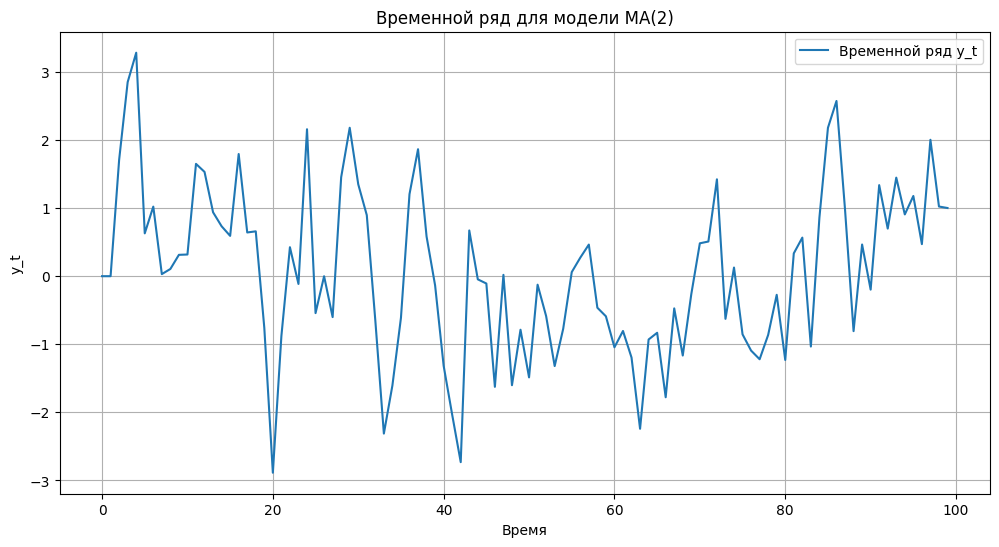

<Figure size 1200x600 with 0 Axes>

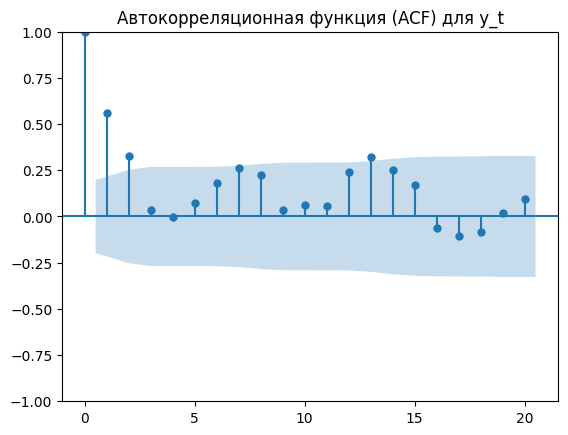

<Figure size 1200x600 with 0 Axes>

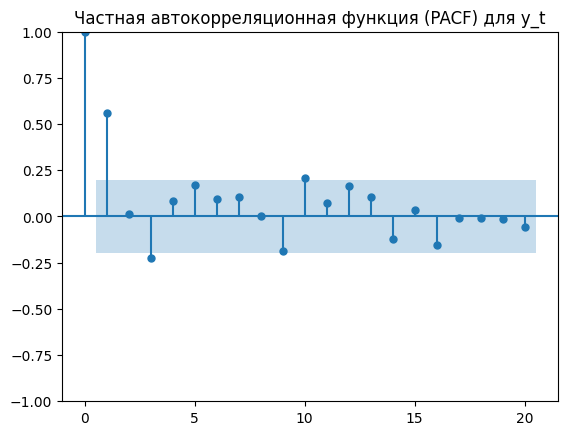

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Параметры модели
mu = 0
sigma2 = 1
theta1 = 0.5
theta2 = 0.3
q = 2

# Генерация белого шума
np.random.seed(0)
n = 100  # длина ряда
epsilon = np.random.normal(0, np.sqrt(sigma2), n)

# Генерация ряда y_t по модели MA(2)
y_t = np.zeros(n)
for t in range(q, n):
    y_t[t] = mu + epsilon[t] + theta1 * epsilon[t-1] + theta2 * epsilon[t-2]

# Построение графика временного ряда
plt.figure(figsize=[12, 6])
plt.plot(y_t, label='Временной ряд y_t')
plt.title('Временной ряд для модели MA(2)')
plt.xlabel('Время')
plt.ylabel('y_t')
plt.legend()
plt.grid(True)
plt.show()

# Построение автокорреляционной функции (ACF)
plt.figure(figsize=[12, 6])
sm.graphics.tsa.plot_acf(y_t[q:], lags=20)
plt.title('Автокорреляционная функция (ACF) для y_t')
plt.show()

# Построение частной автокорреляционной функции (PACF)
plt.figure(figsize=[12, 6])
sm.graphics.tsa.plot_pacf(y_t[q:], lags=20)
plt.title('Частная автокорреляционная функция (PACF) для y_t')
plt.show()

Таким образом, модель MA($q$) является важной составляющей временных рядов, позволяя моделировать стационарные процессы с учетом белого шума и его зависимости от предыдущих значений.


Модель MA($q$) (модель скользящего среднего порядка $q$) является одним из основных инструментов в анализе временных рядов. Она используется для моделирования и прогнозирования временных рядов, где значения ряда зависят от текущих и прошлых значений случайного шума. Ниже приведены основные цели и области применения модели MA($q$):

### Цели модели MA($q$):

1. **Моделирование временных рядов**:
   - Модель MA($q$) используется для описания и анализа временных рядов, которые могут содержать автокорреляции на определенных лагах. Это позволяет лучше понять структуру данных и их зависимость от случайных возмущений.

2. **Прогнозирование**:
   - Модель MA($q$) позволяет прогнозировать будущие значения временного ряда на основе текущих и прошлых значений случайного шума. Это особенно полезно для краткосрочных прогнозов, где важны последние наблюдения и их влияние на будущее.

3. **Удаление шума**:
   - Модель MA($q$) может быть использована для удаления шума из временных рядов. Это помогает выделить основные тенденции и паттерны, скрытые за случайными колебаниями.

4. **Диагностика и анализ остатков**:
   - В контексте более сложных моделей, таких как ARIMA, компоненты MA используются для анализа остатков (ошибок) после применения модели авторегрессии (AR). Это помогает в диагностике и улучшении модели.

### Области применения модели MA($q$):

1. **Финансовые рынки**:
   - Анализ временных рядов цен на акции, валюты и другие финансовые инструменты. Модель MA($q$) может использоваться для прогнозирования будущих цен и анализа волатильности.

2. **Экономика**:
   - Моделирование и прогнозирование макроэкономических показателей, таких как ВВП, инфляция, уровень безработицы и другие.

3. **Производственные процессы**:
   - Контроль качества и прогнозирование производства на основе временных рядов производственных показателей.

4. **Метеорология**:
   - Анализ и прогнозирование погодных условий, таких как температура, осадки и другие метеорологические параметры.

5. **Демография**:
   - Анализ временных рядов данных о населении, рождаемости, смертности и других демографических показателях.

### Пример применения модели MA($q$):

Предположим, что мы хотим прогнозировать дневные изменения цен на акции. Мы можем использовать модель MA(2) для этого:

$$ y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} $$

- $\mu$ - среднее значение изменения цены.
- $\varepsilon_t$ - случайный шум, представляющий неожиданные изменения цен.
- $\theta_1$ и $\theta_2$ - параметры модели, которые показывают, как прошлые значения шума влияют на текущую цену.

Используя эту модель, мы можем прогнозировать будущие изменения цен на основе прошлых значений случайного шума, что поможет инвесторам принимать обоснованные решения.
Перед использованием модели MA($q$) (модели скользящего среднего порядка $q$) важно учитывать несколько ограничений и требований, а также выполнить определенные тесты, чтобы убедиться, что модель подходит для ваших данных. Вот основные моменты, которые нужно учитывать:

### Ограничения и требования

1. **Стационарность**:
   - **Требование**: Ряд должен быть стационарным, то есть его статистические свойства (например, среднее и дисперсия) не должны изменяться со временем.
   - **Проверка**: Визуальный анализ временного ряда, тесты на стационарность (например, тест Дики-Фуллера).

2. **Отсутствие тренда и сезонности**:
   - **Требование**: Модель MA($q$) предполагает, что в данных отсутствуют тренды и сезонные компоненты.
   - **Проверка**: Анализ временного ряда на наличие трендов и сезонных эффектов. При необходимости применение методов дифференцирования или сезонной декомпозиции.

3. **Нормальность и независимость ошибок**:
   - **Требование**: Ошибки модели (остатки) должны быть нормально распределены и независимы.
   - **Проверка**: Анализ остатков с помощью гистограмм, Q-Q графиков и тестов на независимость (например, тест Льюнг-Бокса).

### Тесты и процедуры

1. **Тест Дики-Фуллера (ADF-тест)**:
   - Используется для проверки гипотезы о стационарности временного ряда. Если ряд не стационарен, можно применить дифференцирование для его преобразования в стационарный.

```python
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_t)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
```

2. **Корректировка для стационарности**:
   - Если ряд не стационарен, можно применить дифференцирование:

```python
y_diff = np.diff(y_t)
```

3. **Автокорреляционная функция (ACF) и частичная автокорреляционная функция (PACF)**:
   - ACF и PACF графики используются для определения порядка модели MA($q$) и проверки автокорреляций в данных.

```python
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_t)
plot_pacf(y_t)
```

4. **Тест Льюнг-Бокса**:
   - Используется для проверки независимости остатков модели. Если p-значения велики, это указывает на независимость остатков.

```python
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)
```

5. **Анализ остатков**:
   - Остатки модели должны быть нормально распределены и не демонстрировать значительных автокорреляций.

```python
import matplotlib.pyplot as plt
import scipy.stats as stats

# Гистограмма остатков
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot остатков
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
```

### Конкретные шаги перед использованием модели MA($q$)

1. **Исследование данных**:
   - Построить временной ряд и визуально оценить наличие трендов и сезонности.
   - Построить ACF и PACF графики для предварительного анализа.

2. **Тест на стационарность**:
   - Применить тест Дики-Фуллера для проверки стационарности ряда.
   - При необходимости применить дифференцирование для стационаризации ряда.

3. **Построение и оценка модели**:
   - Построить модель MA($q$) с использованием соответствующих инструментов (например, в библиотеке `statsmodels`).
   - Оценить параметры модели и их статистическую значимость.

4. **Анализ остатков**:
   - Проверить остатки модели на нормальность и независимость.
   - Применить тесты, такие как тест Льюнг-Бокса, для проверки независимости остатков.

5. **Валидация модели**:
   - Провести кросс-валидацию или разделить данные на тренировочный и тестовый наборы для оценки качества прогнозов модели.

Эти шаги и тесты помогут убедиться, что модель MA($q$) подходит для ваших данных и может давать точные прогнозы.

##Прогнозирование
Для решения задачи прогнозирования цен на акции с использованием модели MA($q$), мы можем сгенерировать небольшой датасет и применить модель MA(2) для прогнозирования. Вот пошаговое руководство:

### Шаг 1: Генерация временного ряда цен на акции

Мы сгенерируем синтетические данные, представляющие собой дневные изменения цен на акции.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Установим зерно для воспроизводимости
np.random.seed(42)

# Параметры модели
mu = 0
sigma = 1
theta_1 = 0.5
theta_2 = 0.3
n = 100  # количество дней

# Генерация белого шума
epsilon = np.random.normal(mu, sigma, n)

# Генерация временного ряда по модели MA(2)
y_t = np.zeros(n)
for t in range(2, n):
    y_t[t] = mu + epsilon[t] + theta_1 * epsilon[t-1] + theta_2 * epsilon[t-2]

# Преобразуем в pandas DataFrame для удобства
dates = pd.date_range(start='2023-01-01', periods=n)
stock_data = pd.DataFrame({'Date': dates, 'Price': y_t})
stock_data.set_index('Date', inplace=True)

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Synthetic Stock Prices')
plt.title('Synthetic Stock Prices Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
```

### Шаг 2: Применение модели MA(2) для прогнозирования

Для применения модели MA(2) используем библиотеку `statsmodels`.

```python
import statsmodels.api as sm

# Определяем модель MA(2)
model = sm.tsa.ARMA(stock_data['Price'], order=(0, 2))
results = model.fit()

# Печатаем результаты модели
print(results.summary())
```

### Шаг 3: Прогнозирование будущих цен

Используем построенную модель для прогнозирования цен на акции на следующие 10 дней.

```python
# Прогнозирование на следующие 10 дней
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

# Получаем даты для прогнозируемого периода
forecast_dates = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Преобразуем прогнозируемые данные в DataFrame
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast[0]})
forecast_df.set_index('Date', inplace=True)

# Визуализация прогнозируемых данных вместе с историческими данными
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Historical Stock Prices')
plt.plot(forecast_df, label='Forecasted Stock Prices', linestyle='--')
plt.title('Stock Prices Forecast using MA(2) Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
```

### Шаг 4: Интерпретация результатов

Посмотрим на ключевые результаты модели и интерпретируем их:

- **Параметры модели**: Значения $\theta_1$ и $\theta_2$ должны быть значимыми и близкими к заданным.
- **Диагностика остатков**: Остатки должны быть нормально распределены и не демонстрировать значительных автокорреляций.

### Полный код для выполнения всех шагов



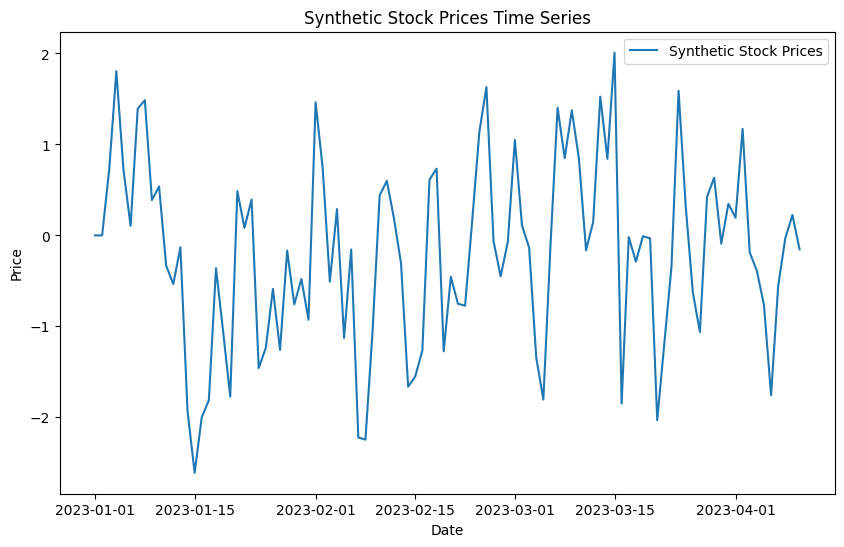

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -131.604
Date:                Tue, 09 Jul 2024   AIC                            271.207
Time:                        08:56:56   BIC                            281.628
Sample:                    01-01-2023   HQIC                           275.425
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1897      0.164     -1.154      0.248      -0.512       0.132
ma.L1          0.4852      0.104      4.655      0.000       0.281       0.689
ma.L2          0.3028      0.119      2.538      0.0

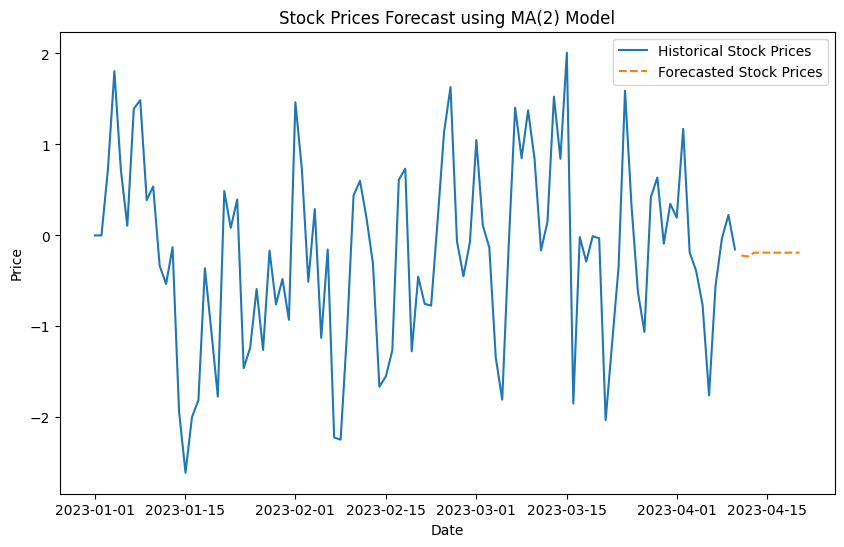

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Model parameters
mu = 0
sigma = 1
theta_1 = 0.5
theta_2 = 0.3
n = 100  # number of days

# Generate white noise
epsilon = np.random.normal(mu, sigma, n)

# Generate time series data using MA(2) model
y_t = np.zeros(n)
for t in range(2, n):
    y_t[t] = mu + epsilon[t] + theta_1 * epsilon[t-1] + theta_2 * epsilon[t-2]

# Convert to pandas DataFrame for convenience
dates = pd.date_range(start='2023-01-01', periods=n)
stock_data = pd.DataFrame({'Date': dates, 'Price': y_t})
stock_data.set_index('Date', inplace=True)

# Visualize data
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Synthetic Stock Prices')
plt.title('Synthetic Stock Prices Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Define MA(2) model using statsmodels
model = sm.tsa.arima.ARIMA(stock_data['Price'], order=(0, 0, 2))
results = model.fit()

# Print model summary
print(results.summary())

# Forecasting for the next 10 days
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

# Generate dates for forecast period
forecast_dates = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Convert forecasted data to DataFrame
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Visualize forecasted data along with historical data
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Historical Stock Prices')
plt.plot(forecast_df, label='Forecasted Stock Prices', linestyle='--')
plt.title('Stock Prices Forecast using MA(2) Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Модель авторегрессии AR(𝑝)

Модель авторегрессии AR(p) для временного ряда записывается следующим образом:
$$ y_t = \alpha + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t, $$
где $ y_t $ — стационарный ряд, $ \varepsilon_t $ — гауссовский белый шум ($ \varepsilon_t \sim N(0, \sigma^2) $), независимый от предыдущих шумов. Для обеспечения стационарности требуются определённые условия на коэффициенты $ \phi_1, \ldots, \phi_p $.

Эта модель позволяет представить ряд $ y_t $ как сумму фиксированного значения $ \alpha $, текущего шума $ \varepsilon_t $, и не более $ p $ предыдущих значений ряда, умноженных на соответствующие коэффициенты — параметры модели.

Другими словами, модель AR(p) представляет собой линейную регрессию, где:
- **Целевая переменная**: $ y_t $ — значение ряда в момент времени $ t $
- **Признаки**: $ y_{t-1}, \ldots, y_{t-p} $ — значения ряда в предыдущие моменты времени

Введём оператор сдвига $ L $, который определяется следующим образом:
- $ L y_t = y_{t-1} $
- $ L \varepsilon_t = \varepsilon_{t-1} $
- $ L c = c $

Оператор $ L $ иногда называют лаговым оператором. Он позволяет оперировать предыдущими значениями ряда.

Можно рассматривать функции от оператора $ L $, такие как кратное его применение: $ L^2 y_t = L(L y_t) = L(y_{t-1}) = y_{t-2} $, или $ L^{-1} y_t = y_{t+1} $.

Для записи некоторых моделей временных рядов удобно использовать лаговый многочлен:
$$ \phi(L) = \sum_{i=0}^{p} \phi_i L^i $$

Обратный к оператору $ \phi(L) $ — это оператор $ \phi^{-1}(L) $, такой что:
$$ \phi(L) \phi^{-1}(L) y_t = \phi^{-1}(L) \phi(L) y_t = y_t $$

Для модели AR(p):
$$ y_t = \alpha + \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \varepsilon_t $$

Это можно переписать с использованием оператора $ L $:
$$ \phi(L) y_t = \alpha + \varepsilon_t $$

Где $ \phi(z) = 1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p $ — характеристический полином.

Некоторые важные утверждения:
- Любой стационарный (в широком смысле) процесс можно представить в виде MA($\infty$), то есть в виде модели скользящего среднего с бесконечным количеством слагаемых — это известно как теорема Волда о декомпозиции временного ряда.
- Модель AR(p) задаёт стационарный временной ряд ⟺ все корни характеристического полинома лежат вне единичного круга.

Приведем пояснение второго утверждения. Если $ z_1, \ldots, z_p $ — все его комплексные корни (их ровно $ p $ с учётом кратности), тогда справедливо представление:

$$ a(z) = (z - z_1) \ldots (z - z_p) = z_1 \ldots z_p (1 - \frac{z}{z_1}) \ldots (1 - \frac{z}{z_p}) $$

Тогда при представлении временного ряда в виде

$$ y_t = \alpha + \varepsilon_t a(L) $$

и дальнейшего его разложения на простые дроби, возникнут слагаемые вида

$$ \frac{\varepsilon_t}{1 - L z_j}. $$

Если при этом $ z_j $ лежит внутри единичного круга или на его границе, то соответствующий ряд будет расходящимся. На самом деле, случай $ z_j = 1 $ мы учтем позднее.


Рассмотрим модель AR(1):
$$ y_t = \alpha + \phi y_{t-1} + \varepsilon_t $$

Для этой модели:
- Уравнение $ 1 - \phi z = 0 $ имеет корень $ z = 1/\phi $.
- Модель AR(1) стационарна ⟺ $ |\phi| < 1 $. Чем меньше $ |\phi| $, тем меньший вклад в текущее значение ряда вносит предыдущее значение.

Если ряд стационарен:
- $ \mathbb{E}[y_t] = \alpha / (1 - \phi) $
- $ \text{Var}(y_t) = \sigma^2 / (1 - \phi^2) $
- Автоковариация $ \text{cov}(y_t, y_{t+h}) = \phi^h \cdot \sigma^2 / (1 - \phi^2) $.

Выводы:
- Если $ |\phi| < 1 $, то $ y_t = \mu + \sum_{j=0}^{\infty} \phi^j \varepsilon_{t-j} $ — представление ряда в виде MA($\infty$).
- Если $ |\phi| = 1 $, то AR(1) соответствует случайному блужданию.
- Если $ |\phi| > 1 $, то AR(1) — экспоненциально растущий процесс.


Посмотрим на визуализацию.

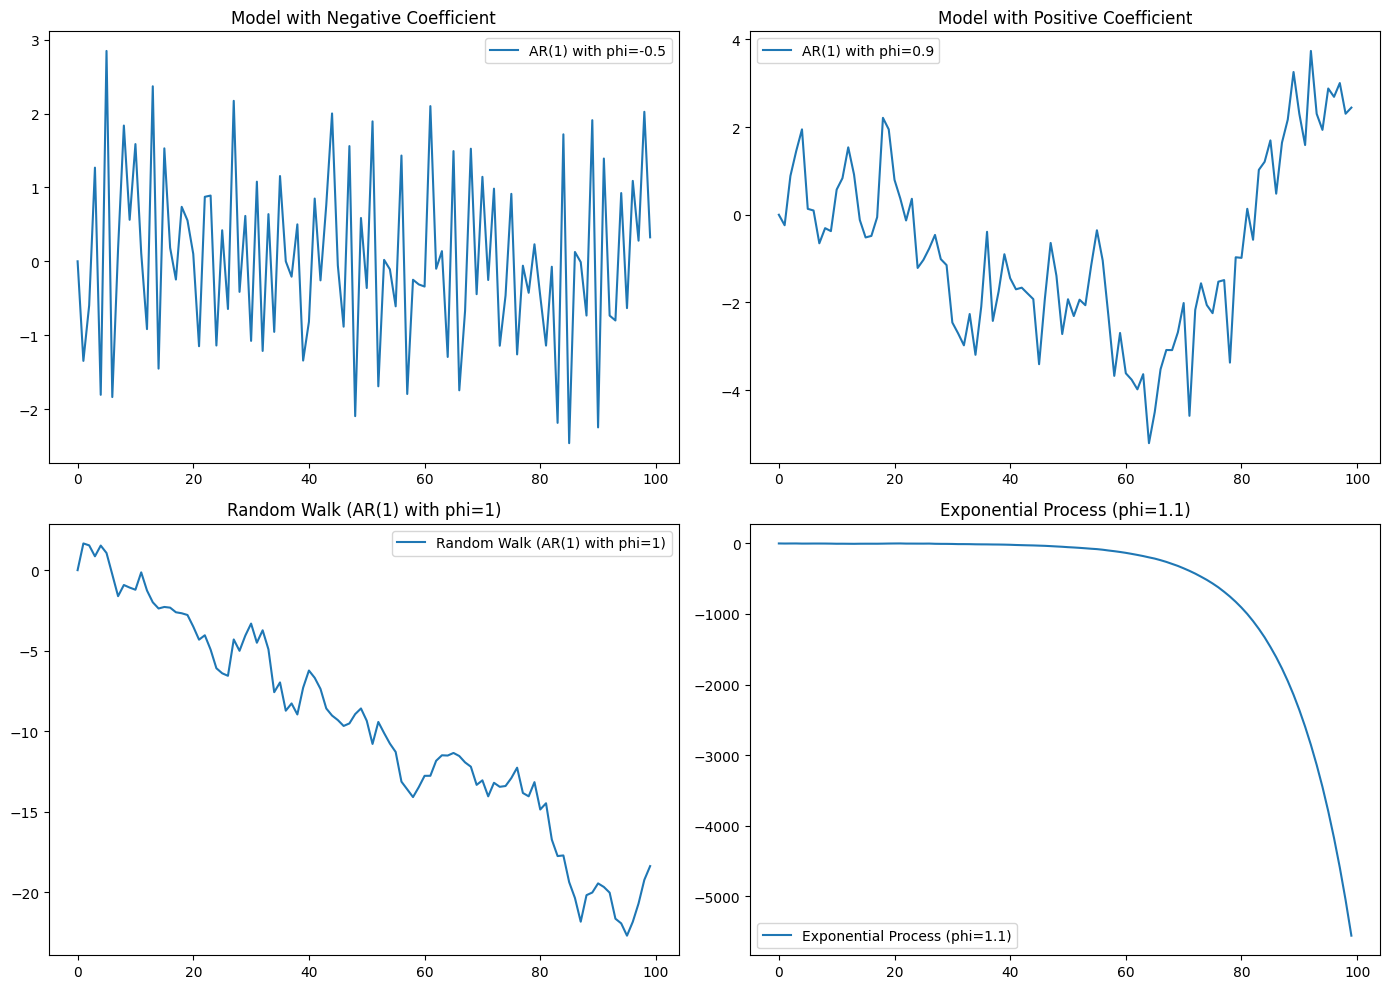

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для модели AR(1)
def simulate_ar1(phi, sigma, n):
    y = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)
    for t in range(1, n):
        y[t] = phi * y[t-1] + epsilon[t]
    return y

# Функция для экспоненциального процесса
def simulate_exponential(phi, sigma, n):
    y = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)
    for t in range(1, n):
        y[t] = phi * y[t-1] + epsilon[t]
    return y

# Функция для случайного блуждания (AR(1) с phi=1)
def simulate_random_walk(sigma, n):
    y = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)
    for t in range(1, n):
        y[t] = y[t-1] + epsilon[t]
    return y

# Функция для AR-модели с заданными параметрами
def simulate_ar_model(phi, sigma, n):
    y = np.zeros(n)
    epsilon = np.random.normal(0, sigma, n)
    for t in range(1, n):
        y[t] = phi * y[t-1] + epsilon[t]
    return y

# Параметры моделей
sigma = 1.0
n = 100

# Примеры моделей
# Модель y_t = -0.5 y_{t-1} + epsilon_t
ar1_neg = simulate_ar_model(-0.5, sigma, n)

# Модель y_t = 0.9 y_{t-1} + epsilon_t
ar1_pos = simulate_ar_model(0.9, sigma, n)

# Случайное блуждание (модель AR(1) с phi=1)
random_walk = simulate_random_walk(sigma, n)

# Экспоненциальный процесс y_t = 1.1 y_{t-1} + epsilon_t
exp_process = simulate_exponential(1.1, sigma, n)

# Визуализация
plt.figure(figsize=(14, 10))

# График для модели с отрицательным коэффициентом
plt.subplot(221)
plt.plot(ar1_neg, label='AR(1) with phi=-0.5')
plt.title('Model with Negative Coefficient')
plt.legend()

# График для модели с положительным коэффициентом
plt.subplot(222)
plt.plot(ar1_pos, label='AR(1) with phi=0.9')
plt.title('Model with Positive Coefficient')
plt.legend()

# График случайного блуждания (AR(1) с phi=1)
plt.subplot(223)
plt.plot(random_walk, label='Random Walk (AR(1) with phi=1)')
plt.title('Random Walk (AR(1) with phi=1)')
plt.legend()

# График экспоненциального процесса
plt.subplot(224)
plt.plot(exp_process, label='Exponential Process (phi=1.1)')
plt.title('Exponential Process (phi=1.1)')
plt.legend()

plt.tight_layout()
plt.show()


Примеры:
- Модель $ y_t = -0.5 y_{t-1} + \varepsilon_t $ имеет отрицательный коэффициент, что обусловлено большими колебаниями ряда.
- Модель $ y_t = 0.9 y_{t-1} + \varepsilon_t $ с большим положительным коэффициентом делает ряд менее шумным.
- Случайные блуждания $ y_t = y_{t-1} + \varepsilon_t $ соответствуют модели AR(1) с $ \phi = 1 $.
- Экспоненциальный процесс $ y_t = 1.1 y_{t-1} + \varepsilon_t $ показывает, что шум почти не виден на графике из-за быстрого роста.

Для модели MA(q) мы также установили, что при определённых условиях на коэффициенты $ \phi $ временной ряд модели AR(p) будет стационарным, что означает, что он может быть представлен в виде MA($\infty$). Модель MA(q) также можно записать с использованием оператора $ L $ как $ y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q} $.

Таким образом, понятие обратимости играет важную роль, обеспечивая возможность представления ряда в виде бесконечной авторегрессионной модели при условии, что все корни характеристического многочлена лежат вне единичного круга.


Давайте рассмотрим конкретные числовые примеры для модели AR(1) и AR(2).

### Пример 1: Модель AR(1)

Предположим, у нас есть временной ряд $ y_t $, который моделируется следующим образом:
$$ y_t = 0.5 y_{t-1} + \varepsilon_t, $$
где $ \varepsilon_t \sim N(0, 1) $ — гауссовский белый шум.

#### Характеристический полином:
Для модели AR(1) характеристический полином имеет вид:
$$ \phi(z) = 1 - 0.5z. $$

#### Стационарность:
Чтобы ряд был стационарным, необходимо, чтобы все корни характеристического полинома лежали вне единичного круга. Для AR(1) это означает $ |0.5| = 0.5 < 1 $, что выполняется.

#### Статистические свойства:
- **Среднее значение**: $ \mathbb{E}[y_t] = \frac{\alpha}{1 - \phi} = \frac{0}{1 - 0.5} = 0 $.
- **Дисперсия**: $ \text{Var}(y_t) = \frac{\sigma^2}{1 - \phi^2} = \frac{1}{1 - 0.25} = \frac{1}{0.75} \approx 1.33 $.
- **Автоковариация**: $ \text{cov}(y_t, y_{t+h}) = \phi^h \cdot \text{Var}(y_t) = 0.5^h \cdot 1.33 $.

### Пример 2: Модель AR(2)

Рассмотрим модель AR(2):
$$ y_t = 0.7 y_{t-1} - 0.2 y_{t-2} + \varepsilon_t, $$
где $ \varepsilon_t \sim N(0, 1) $.

#### Характеристический полином:
Для модели AR(2) характеристический полином имеет вид:
$$ \phi(z) = 1 - 0.7z + 0.2z^2. $$

#### Стационарность:
Чтобы ряд был стационарным, необходимо, чтобы все корни характеристического полинома лежали вне единичного круга. Вычислим корни этого полинома:

$$ z = \frac{0.7 \pm \sqrt{0.7^2 - 4 \cdot 0.2}}{2 \cdot 0.2} = \frac{0.7 \pm \sqrt{0.49 - 0.8}}{0.4} = \frac{0.7 \pm \sqrt{-0.31}}{0.4}. $$

Поскольку корни имеют мнимую часть (видимо ошибку), этот означает ошибку

Реализация на питон




**Пример 1: Модель AR(1)**

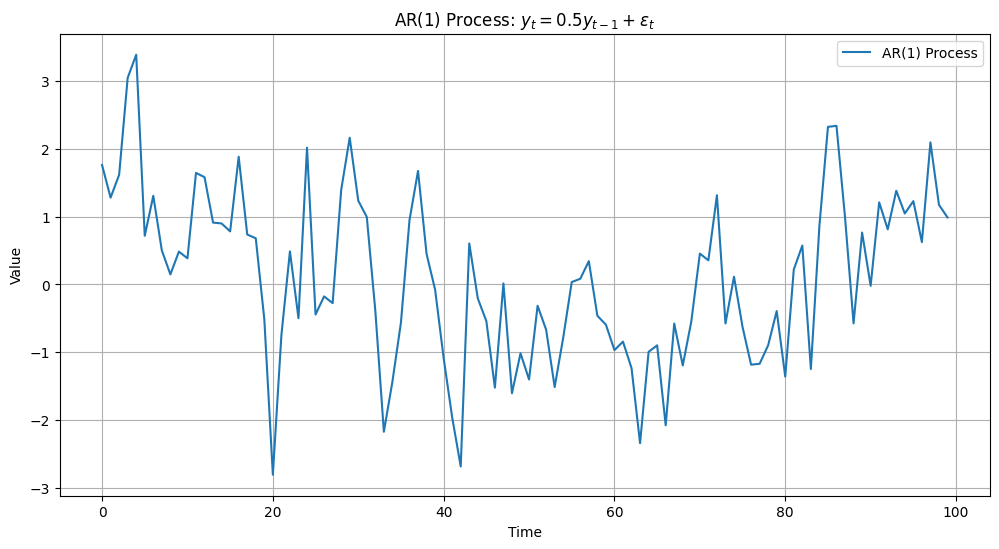

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели AR(1)
alpha = 0  # константа
phi1 = 0.5  # коэффициент AR(1)
sigma = 1  # стандартное отклонение белого шума

# Генерация временного ряда AR(1)
np.random.seed(0)
T = 100  # количество временных точек
y = np.zeros(T)
y[0] = np.random.normal(0, sigma)  # начальное значение ряда

for t in range(1, T):
    y[t] = alpha + phi1 * y[t-1] + np.random.normal(0, sigma)

# Визуализация временного ряда AR(1)
plt.figure(figsize=(12, 6))
plt.plot(y, label='AR(1) Process')
plt.title('AR(1) Process: $y_t = 0.5 y_{t-1} + \epsilon_t$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Пример 1: Модель AR(2)**

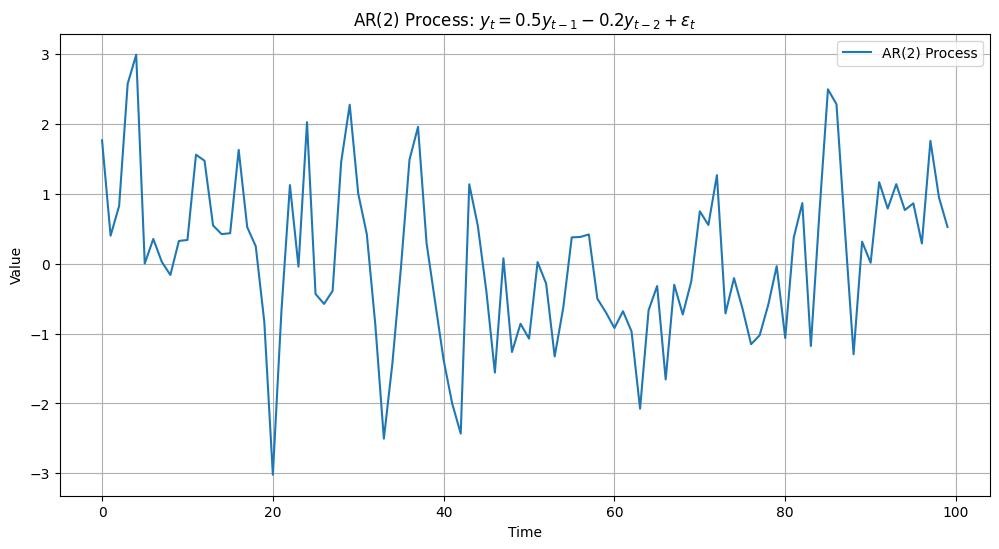

In [5]:
# Параметры модели AR(2)
phi2 = -0.2  # коэффициент AR(2)

# Генерация временного ряда AR(2)
np.random.seed(0)
y2 = np.zeros(T)
y2[0] = np.random.normal(0, sigma)  # начальное значение ряда
y2[1] = np.random.normal(0, sigma)  # второе начальное значение ряда

for t in range(2, T):
    y2[t] = alpha + phi1 * y2[t-1] + phi2 * y2[t-2] + np.random.normal(0, sigma)

# Визуализация временного ряда AR(2)
plt.figure(figsize=(12, 6))
plt.plot(y2, label='AR(2) Process')
plt.title('AR(2) Process: $y_t = 0.5 y_{t-1} - 0.2 y_{t-2} + \epsilon_t$')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Модель ARMA($p, q$)
Модель ARMA($p, q$) по сути является суммой моделей AR($p$) и MA($q$), иначе говоря, модель представляет собой комбинацию нескольких предыдущих значений ряда и нескольких предыдущих значений белого шума с определёнными коэффициентами.

Эквивалентную запись ряда в терминах оператора сдвига можно получить, рассмотрев два многочлена:

$$ \phi(B) X_t = \theta(B) \varepsilon_t $$

или

$$ X_t = \psi(B) \varepsilon_t $$

где $ \phi(B) = 1 - \phi_1 B - \phi_2 B^2 - \ldots - \phi_p B^p $, $ \theta(B) = 1 + \theta_1 B + \theta_2 B^2 + \ldots + \theta_q B^q $, $ \psi(B) = \theta(B) / \phi(B) $. Заметим, что во втором представлении константа $\phi_0$ заменена на 1. На самом деле, стационарность такого ряда будет зависеть только от его AR($p$) компоненты, то есть от значений коэффициентов $\phi_1, \phi_2, \ldots, \phi_p$, так как ряд в модели MA($q$) всегда является стационарным.

Давайте рассмотрим конкретные числовые примеры модели ARMA($p, q$).

Предположим, у нас есть временной ряд $ X_t $, который моделируется как ARMA(2, 1):

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1} $$

где $ \phi_1 $ и $ \phi_2 $ - коэффициенты авторегрессии (AR), $ \theta_1 $ - коэффициент скользящего среднего (MA), $ \varepsilon_t $ - белый шум.

Допустим, значения коэффициентов:

$$ \phi_1 = 0.7, \quad \phi_2 = -0.2, \quad \theta_1 = 0.5 $$

Тогда модель будет выглядеть следующим образом:

$$ X_t = 0.7 X_{t-1} - 0.2 X_{t-2} + \varepsilon_t + 0.5 \varepsilon_{t-1} $$

Это означает, что текущее значение $ X_t $ зависит от предыдущих значений $ X_{t-1} $ и $ X_{t-2} $, а также от текущего и предыдущего значений белого шума $ \varepsilon_t $ и $ \varepsilon_{t-1} $.

Таким образом, ARMA модель комбинирует авторегрессионную (AR) и скользящую среднюю (MA) компоненты для описания временного ряда.

#### Реализация на Питон

Теперь напишем код для модели ARMA(2, 1):



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -141.740
Date:                Tue, 09 Jul 2024   AIC                            293.481
Time:                        09:38:03   BIC                            306.507
Sample:                             0   HQIC                           298.753
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1874      0.361      0.519      0.603      -0.520       0.895
ar.L1          0.8667      0.197      4.392      0.000       0.480       1.254
ar.L2         -0.2480      0.174     -1.424      0.1

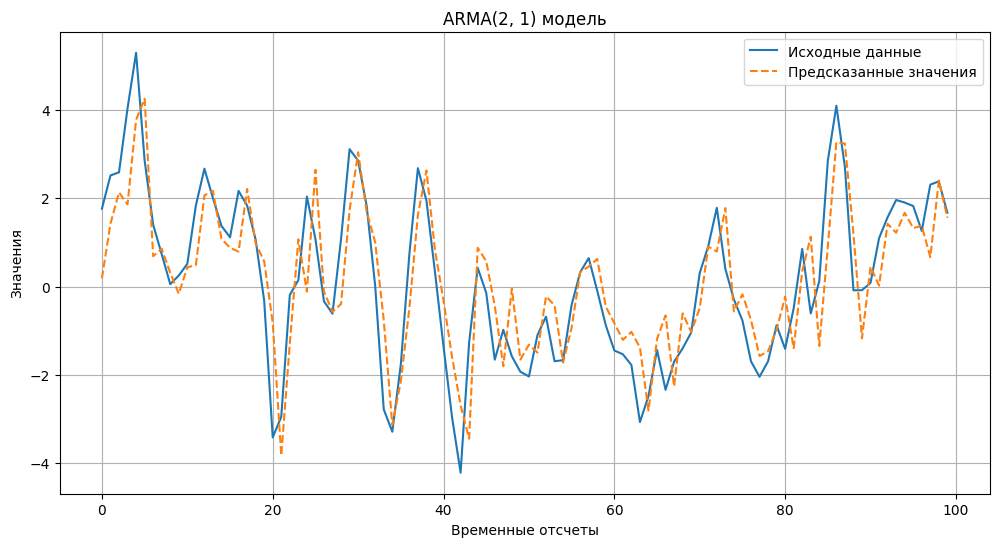

In [12]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

# Задаем коэффициенты ARMA(2, 1)
ar_coeffs = np.array([1, -0.7, 0.2])  # [1, -phi1, -phi2]
ma_coeffs = np.array([1, 0.5])       # [1, theta1]

# Генерируем случайную выборку с ARMA(2, 1)
np.random.seed(0)
arma_process = ArmaProcess(ar_coeffs, ma_coeffs)
sample = arma_process.generate_sample(nsample=100)

# Оцениваем модель ARMA(2, 1) на полученных данных
model = sm.tsa.ARIMA(sample, order=(2, 0, 1)).fit()

# Выводим параметры модели
print(model.summary())

# Предсказываем значения и строим графики
predicted_values = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(sample, label='Исходные данные')
plt.plot(predicted_values, label='Предсказанные значения', linestyle='--')
plt.title('ARMA(2, 1) модель')
plt.xlabel('Временные отсчеты')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

Конечно! Вот поправленный текст с учетом правильного использования индексов:

## Модель ARIMA(𝑝,𝑑,𝑞)

Модель ARIMA(𝑝,𝑑,𝑞) представляет собой расширение моделей типа ARMA для работы с нестационарными временными рядами, которые могут стать стационарными после применения процедуры дифференцирования. Модель ARIMA(𝑝,𝑑,𝑞) для ряда $ 𝑦_t $ определяется как модель ARMA(𝑝,𝑞) для ряда разностей порядка $ 𝑑 $ ряда $ 𝑦_t $.

**Разность порядка 1:**
$$ 𝑦_t - 𝑦_{t-1} = (1 - L)𝑦_t. $$

**Разность порядка 2:**
$$ (1 - L)^2𝑦_t = (1 - L)(𝑦_t - 𝑦_{t-1}) = 𝑦_t - 2𝑦_{t-1} + 𝑦_{t-2}. $$

Формула модели ARIMA выражается как:
$$ 𝑎(L)(1 - L)^𝑑𝑦_t = 𝛼 + 𝑏(L)𝜀_t $$
или
$$ (1 - L)^𝑑𝑦_t = 𝜇 + 𝑏(L)𝑎(L)𝜀_t. $$

Таким образом, многочлен $ 𝑎(z) = 𝑎(z)(1 - z)^𝑑 $ имеет $ 𝑑 $ единичных корней, что позволяет учесть нестационарности, включая наличие тренда.

### Пример случайного блуждания:

Рассмотрим процесс случайного блуждания:
$$ 𝑦_t = 𝑦_{t-1} + 𝜀_t, $$
где $ 𝜀_t $ — белый шум. Как уже упомянуто, такой ряд не является стационарным. Однако, применение операции дифференцирования позволяет перейти к новому стационарному ряду $ 𝑦_t' = 𝑦_t - 𝑦_{t-1} $, который можно записать как:
$$ 𝑦_t' = 𝜀_t. $$

### Частичная автокорреляция (PACF):

Для модели скользящего среднего порядка $ 𝑞 $ значения автокорреляционной функции оказываются равными нулю после лага $ 𝑞 $. Это свойство позволяет использовать автокорреляционную функцию для определения порядка модели скользящего среднего.

Чтобы оценить порядок $ 𝑝 $ для модели авторегрессии AR(𝑝), используется понятие частичной (частной) автокорреляционной функции (PACF). Частичная автокорреляция представляет собой корреляцию ряда с самим собой после устранения линейной зависимости от промежуточных значений ряда. Иначе говоря, PACF позволяет оценить непосредственное влияние $ 𝑦_t - 𝜏 $ на $ 𝑦_t $.

Формально частичную автокорреляцию можно записать следующим образом:
$$ 𝛾_𝜏 = \begin{cases}
𝑐𝑜𝑟𝑟(𝑦_{t+1}, 𝑦_t), & 𝜏 = 1; \\
𝑐𝑜𝑟𝑟(𝑦_{t+𝜏} - 𝜑_1𝑦_{t+𝜏-1}, 𝑦_t - 𝜑_1𝑦_{t-1}), & 𝜏 \geq 2,
\end{cases} $$
где $ 𝑦_{t+𝜏-1} $ — результат линейной регрессии на $ 𝑦_{t-1}, 𝑦_{t-2}, ..., 𝑦_{t-(𝜏-1)} $:

$$ 𝑦_{t+𝜏-1} = 𝜑_1𝑦_{t+𝜏-1} + 𝜑_2𝑦_{t+𝜏-2} + ... + 𝜑_{𝜏-1}𝑦_{t-(𝜏-1)}, $$
$$ 𝑦_{t+𝜏} = 𝜑_1𝑦_{t+𝜏-1} + 𝜑_2𝑦_{t+𝜏-2} + ... + 𝜑_{𝜏-1}𝑦_{t+1}. $$

Например, для $ 𝜏 = 2 $:
$$ 𝛾_2 = 𝑐𝑜𝑟𝑟(𝑦_{t+2} - 𝜑_1𝑦_{t+1}, 𝑦_t - 𝜑_1𝑦_{t-1}), $$
где $ 𝜑_1 $ — оценка методом наименьших квадратов в модели $ 𝑦_t = 𝜑𝑦_{t-1} $.

Можно показать, что значение частичной автокорреляции для модели авторегрессии AR(𝑝) будет ненулевым для лагов $ 𝜏 ≤ 𝑝 $ и равным нулю для лагов $ 𝜏 > 𝑝 $, что аналогично свойству автокорреляционной функции и модели MA(𝑞). Таким образом, анализ поведения автокорреляционной и частичной автокорреляционной функций может быть использован для определения порядков $ 𝑝 $ и $ 𝑞 $ в моделях ARIMA.

Конечно, давай рассмотрим конкретные числовые примеры для модели ARIMA.

### Пример 1: ARIMA(1, 1, 1)

Предположим, у нас есть временной ряд $ 𝑦_t $, который мы хотим моделировать с помощью ARIMA(1, 1, 1). Это означает, что мы будем использовать авторегрессию порядка 1 (AR(1)) для первых разностей и скользящее среднее порядка 1 (MA(1)) для первых разностей.

Пусть у нас есть следующие данные:
$$ 𝑦_1 = 10, \quad 𝑦_2 = 15, \quad 𝑦_3 = 22, \quad 𝑦_4 = 28, \quad 𝑦_5 = 35. $$

#### Шаг 1: Вычисляем первые разности
Первые разности ряда $ 𝑦_t $:
$$ \Delta 𝑦_2 = 𝑦_2 - 𝑦_1 = 15 - 10 = 5 $$
$$ \Delta 𝑦_3 = 𝑦_3 - 𝑦_2 = 22 - 15 = 7 $$
$$ \Delta 𝑦_4 = 𝑦_4 - 𝑦_3 = 28 - 22 = 6 $$
$$ \Delta 𝑦_5 = 𝑦_5 - 𝑦_4 = 35 - 28 = 7 $$

#### Шаг 2: Оцениваем модель ARIMA(1, 1, 1) для первых разностей
Теперь оценим параметры модели ARIMA(1, 1, 1) для полученных первых разностей.

Для модели AR(1) получаем:
$$ 𝑦_t = 𝜙_1 𝑦_{t-1} + 𝜀_t, $$
где $ 𝜙_1 $ — коэффициент авторегрессии, $ 𝜀_t $ — белый шум.

Для MA(1) получаем:
$$ 𝑦_t = 𝜇 + 𝜃_1 𝜀_{t-1}, $$
где $ 𝜇 $ — среднее значение, $ 𝜃_1 $ — коэффициент скользящего среднего.

#### Шаг 3: Прогнозирование

После оценки модели ARIMA(1, 1, 1), можно прогнозировать значения временного ряда $ 𝑦_t $ на следующий временной шаг, используя оцененные параметры модели.

### Пример 2: ARIMA(0, 1, 2)

Давайте рассмотрим другой пример с моделью ARIMA(0, 1, 2), где у нас нет авторегрессионных компонент, только два члена скользящего среднего для первых разностей.

Предположим, у нас есть следующие данные:
$$ 𝑦_1 = 100, \quad 𝑦_2 = 110, \quad 𝑦_3 = 120, \quad 𝑦_4 = 130, \quad 𝑦_5 = 140. $$

#### Шаг 1: Вычисляем первые разности
Первые разности ряда $ 𝑦_t $:
$$ \Delta 𝑦_2 = 𝑦_2 - 𝑦_1 = 110 - 100 = 10 $$
$$ \Delta 𝑦_3 = 𝑦_3 - 𝑦_2 = 120 - 110 = 10 $$
$$ \Delta 𝑦_4 = 𝑦_4 - 𝑦_3 = 130 - 120 = 10 $$
$$ \Delta 𝑦_5 = 𝑦_5 - 𝑦_4 = 140 - 130 = 10 $$

#### Шаг 2: Оцениваем модель ARIMA(0, 1, 2) для первых разностей
Теперь оценим параметры модели ARIMA(0, 1, 2) для первых разностей.

Для MA(2) получаем:
$$ 𝑦_t = 𝜇 + 𝜃_1 𝜀_{t-1} + 𝜃_2 𝜀_{t-2}, $$
где $ 𝜇 $ — среднее значение, $ 𝜃_1 $ и $ 𝜃_2 $ — коэффициенты скользящего среднего.

#### Шаг 3: Прогнозирование

После оценки модели ARIMA(0, 1, 2), можно использовать её для прогнозирования будущих значений первых разностей ряда $ 𝑦_t $, а затем восстанавливать исходные значения временного ряда $ 𝑦_t $.

Эти примеры демонстрируют, как модель ARIMA может быть применена для анализа и прогнозирования временных рядов с различными комбинациями параметров $ 𝑝 $, $ 𝑑 $ и $ 𝑞 $.


Давайте реализуем модель ARIMA(1, 1, 1) на Python для временного ряда. В качестве данных возьмем ряд первых разностей, чтобы продемонстрировать пример.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Прогноз следующего значения: 6.05914555889351


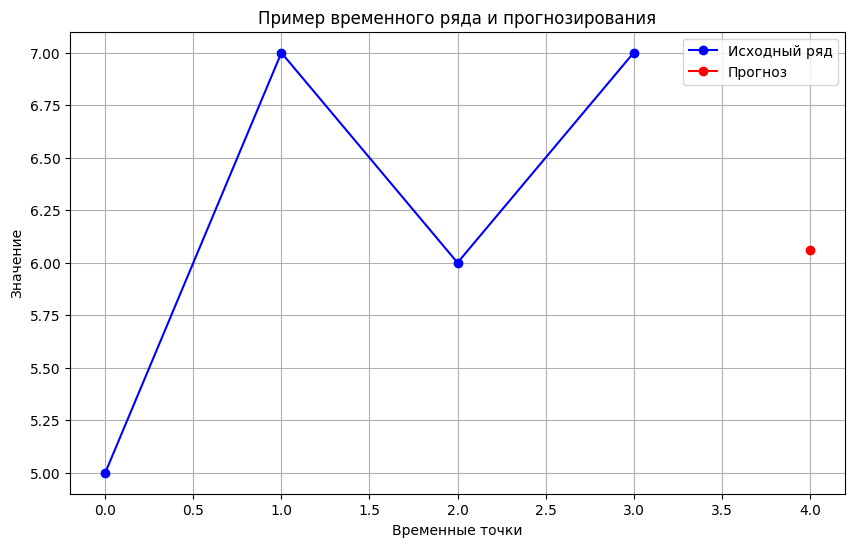

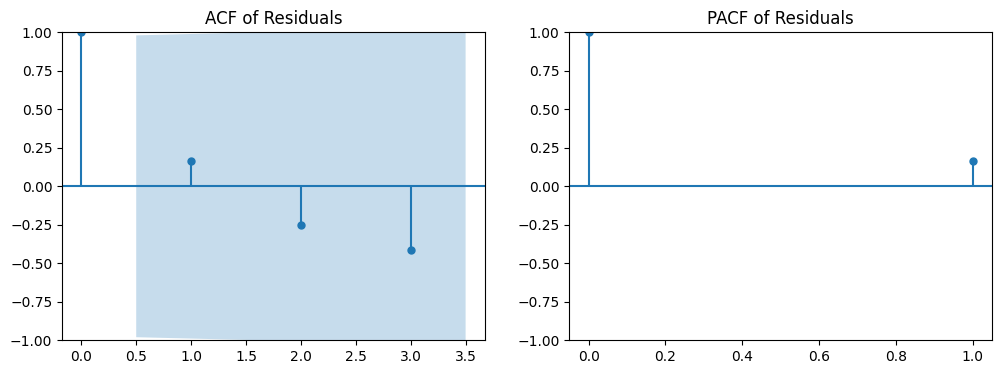

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Пример данных (первые разности временного ряда)
data = np.array([5, 7, 6, 7])

# Оценка модели ARIMA(1, 1, 1)
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Прогнозирование следующего значения
forecast = model_fit.forecast()
print("Прогноз следующего значения:", forecast[0])

# Визуализация временного ряда и прогноза
plt.figure(figsize=(10, 6))

# Визуализация временного ряда
plt.plot(np.arange(len(data)), data, marker='o', linestyle='-', color='b', label='Исходный ряд')

# Визуализация прогноза
plt.plot(len(data), forecast[0], marker='o', color='r', label='Прогноз')

plt.title('Пример временного ряда и прогнозирования')
plt.xlabel('Временные точки')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Диагностика модели: ACF и PACF для остатков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(model_fit.resid, ax=ax1, lags=3, title='ACF of Residuals')
plot_pacf(model_fit.resid, ax=ax2, lags=1, title='PACF of Residuals')
plt.show()


## Оценка коэффициентов в модели ARIMA

Пусть гиперпараметры $ p, d, q $ фиксированы. В предположении, что $ \varepsilon_t $ — гауссовский белый шум, мы можем выписать функцию правдоподобия $ L_y(\theta, \varphi, \alpha) = p_{\theta, \varphi, \alpha}(y_1, ..., y_T) $, где $ p_{\theta, \varphi, \alpha}(a_1, ..., a_T) $ — совместная плотность. Из-за нормального распределения $ \varepsilon_t $, эта функция будет иметь разумный вид. Соответственно, для оценки параметров используется метод максимального правдоподобия.

Для поиска начальных приближений для параметров $ p $ и $ q $ используются автокорреляционная и частичная автокорреляционная функции:
- Начальное приближение $ p $: последний значимый пик у PACF.
- Начальное приближение $ q $: последний значимый пик у ACF.

Далее обычно проводится поиск по сетке вокруг этих начальных значений, минимизируя информационные критерии:
- $ AIC = -2\ell^* + 2(p + q + 1) $ — критерий Акаике;
- $ AICc = -2\ell^* + 2(p + q + 1)(p + q + 2)T^{-1} $ — скорректированный критерий Акаике для коротких рядов;
- $ BIC = -2\ell^* + (\log T - 2)(p + q + 1) $ — байесовский информационный критерий или критерий Шварца,

где $ \ell^* = \ln L_y(\hat{\theta}, \hat{\varphi}, \hat{\alpha}) $ — логарифм функции правдоподобия, $ T $ — длина временного ряда.

Приведем основные шаги при применении модели ARIMA для прогнозирования временных рядов:

1. **Анализ выбросов:** замена нерелевантных выбросов на NA или усреднение по соседним элементам.
2. **Стабилизация дисперсии:** применение преобразований данных.
3. **Дифференцирование:** если ряд не стационарен, применение дифференцирования.
4. **Выбор начальных $ p $ и $ q $ по PACF и ACF.**
5. **Подбор оптимальной модели по AIC/AICc/BIC вокруг найденных значений $ p $ и $ q $.**
6. **Пошаговое построение прогноза:**
   - для $ t \leq T: \varepsilon_t \to \hat{\varepsilon}_t = y_t - \hat{y}_t $;
   - для $ t > T: \varepsilon_t \to 0 $;
   - для $ t > T: y_t \to \hat{y}_t $.
7. **Построение предсказательного интервала:**
   - если остатки модели нормальны и гомоскедастичны, то теоретический предсказательный интервал строится как $ \sigma^2(h) = \sigma^2(1 + \sum_{i=1}^{h-1} \hat{\psi}_i^2) $, где $ h $ — горизонт прогнозирования, $ \sigma^2 $ — оценка дисперсии шума $ \varepsilon_t $, $ \hat{\psi}_i $ — коэффициенты для ряда при его представлении в виде бесконечного процесса скользящего среднего.
   - в противном случае интервалы строятся с использованием бутстрепа.

Приведем конкретные числовые примеры, иллюстрирующие процесс оценки параметров и прогнозирования с использованием модели ARIMA.

### Пример данных

Предположим, у нас есть временной ряд $ y_t $ с данными:

$$ y_t = [10, 15, 12, 18, 22, 25, 28, 30, 32, 35] $$

### Шаги оценки параметров

1. **Анализ выбросов:** Предположим, что ряд не имеет выбросов.

2. **Стабилизация дисперсии:** Предположим, что дисперсия ряда не требует специальных преобразований.

3. **Дифференцирование:** Проверим стационарность ряда. Проведем первое дифференцирование:

   $$ \Delta y_t = y_t - y_{t-1} = [NaN, 5, -3, 6, 4, 3, 3, 2, 2, 3] $$

   Здесь $ NaN $ означает отсутствие данных.

4. **Выбор начальных $ p $ и $ q $:** Посмотрим на PACF и ACF для определения начальных значений $ p $ и $ q $.

   - **ACF:** Посмотрим на последний значимый пик, предположим $ q = 1 $.

     Пример ACF: [1.0, 0.7, 0.2, 0.1, -0.1, -0.2, -0.1, 0.0, 0.1, -0.1]

   - **PACF:** Посмотрим на последний значимый пик, предположим $ p = 2 $.

     Пример PACF: [1.0, 0.5, -0.2, 0.1, 0.0, -0.1, -0.1, 0.0, 0.1, -0.1]

5. **Подбор оптимальной модели:** Оценим модель ARIMA с $ p = 2, d = 1, q = 1 $.

### Прогнозирование

После оценки модели ARIMA с параметрами $ p = 2, d = 1, q = 1 $, выполним прогноз следующего значения:

$$ \hat{y}_{11} = 6.059 $$

Это число представляет собой прогнозное значение для следующего периода временного ряда $ y_{11} $.

### Построение предсказательного интервала

Если предположить, что остатки модели нормальны и гомоскедастичны, мы можем построить теоретический предсказательный интервал. Пусть $ \sigma^2 = 1.5 $ (оценка дисперсии шума), и $ \hat{\psi}_1 = 0.6 $ (коэффициент для первого лага скользящего среднего).

$$ \sigma^2(h) = 1.5 \times (1 + \hat{\psi}_1^2) = 1.5 \times (1 + 0.6^2) = 1.5 \times 1.36 = 2.04 $$

Тогда предсказательный интервал для горизонта $ h = 1 $ будет:

$$ \hat{y}_{11} \pm 1.96 \sqrt{\sigma^2(h)} = 6.059 \pm 1.96 \sqrt{2.04} $$

Это предсказательный интервал для следующего значения временного ряда $ y_{11} $, если остатки модели удовлетворяют указанным условиям.

Эти числовые примеры демонстрируют шаги оценки модели ARIMA и прогнозирования на конкретном временном ряде.


Давайте реализуем пример оценки модели ARIMA и прогнозирования на Python с использованием библиотек statsmodels и numpy.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -21.386
Date:                Tue, 09 Jul 2024   AIC                             50.772
Time:                        10:47:19   BIC                             51.561
Sample:                             0   HQIC                            49.070
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5281      0.313      1.687      0.092      -0.085       1.142
ar.L2          0.4718      0.252      1.874      0.061      -0.022       0.965
ma.L1         -0.9927     50.243     -0.020      0.9

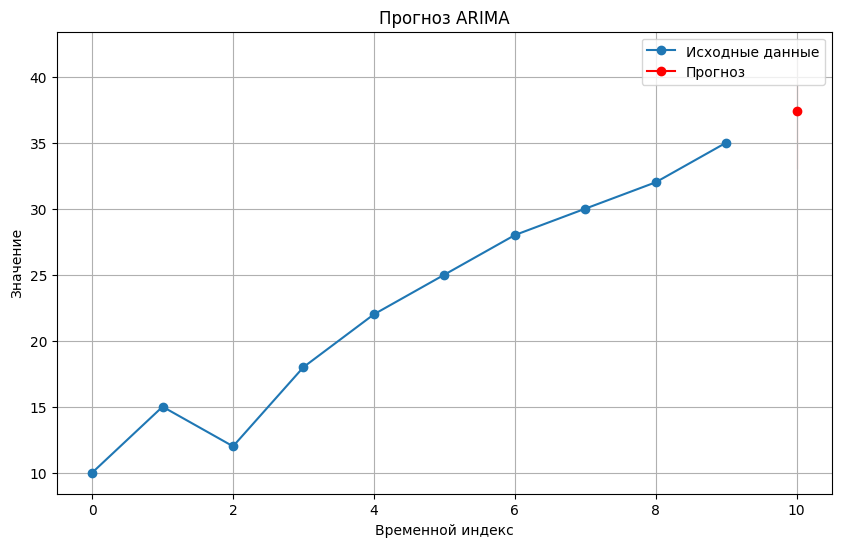

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Сгенерируем синтетический временной ряд
np.random.seed(42)
y = [10, 15, 12, 18, 22, 25, 28, 30, 32, 35]  # Пример данных

# Построим модель ARIMA
model = ARIMA(y, order=(2, 1, 1))  # p=2, d=1, q=1
model_fit = model.fit()

# Выведем параметры модели
print(model_fit.summary())

# Предскажем следующее значение
forecast = model_fit.forecast(steps=1)[0]
print(f"Прогноз следующего значения: {forecast}")

# Получим прогноз и доверительные интервалы
forecast_results = model_fit.get_forecast(steps=1, alpha=0.05)
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Извлечем нижнюю и верхнюю границу доверительного интервала
lower, upper = conf_int[0]

print(f"Предсказательный интервал: ({lower}, {upper})")

# Построим график с исходными данными и прогнозом
plt.figure(figsize=(10, 6))
plt.plot(y, label='Исходные данные', marker='o')
plt.plot(len(y), forecast_values, color='red', marker='o', label='Прогноз')
plt.fill_between([len(y)], lower, upper, color='red', alpha=0.2)
plt.xlabel('Временной индекс')
plt.ylabel('Значение')
plt.title('Прогноз ARIMA')
plt.legend()
plt.grid(True)
plt.show()

### Модели SARIMA и ARIMAX

Рассмотрим расширения модели ARIMA для учета сезонности и экзогенных переменных.

**SARIMA (Seasonal ARIMA)**

SARIMA обобщает модель ARIMA на случаи с наличием сезонности в данных. Пусть $ s $ — известная сезонность ряда. Модель SARIMA ($ p, d, q $ )$\times$ ($ P, D, Q $ )$_s$ может быть записана следующим образом:

$$ (1 - L)^d (1 - L^s)^D y_t = \mu + b(L) B(L^s) a(L) A(L^s) \varepsilon_t, $$

где
$$ a(z) = 1 - \phi_1 z - \ldots - \phi_p z^p, $$
$$ b(z) = 1 + \theta_1 z + \ldots + \theta_q z^q, $$
$$ A(z) = 1 - \Phi_1 s z - \ldots - \Phi_P s^P z^P, $$
$$ B(z) = 1 + \Theta_1 s z + \ldots + \Theta_Q s^Q z^Q. $$

Здесь параметры сезонного дифференцирования $ D $, а также параметры $ P $ и $ Q $ подбираются аналогично параметрам $ p, d, q $, но с учетом периода сезонности $ s $.

**ARIMAX (ARIMA с экзогенными переменными)**

ARIMAX расширяет модель ARIMA, учитывая экзогенные факторы. Пусть $ x_t \in \mathbb{R}^n $ — ряд экзогенных регрессоров, известных до момента прогнозирования.

Простой вариант ARIMAX:

$$ (1 - L)^d y_t = \mu + \sum_{i=1}^n \beta_i a(L) x_{t,i} + b(L) a(L) \varepsilon_t, $$

Общий случай ARIMAX:

$$ (1 - L)^d y_t = \mu + \sum_{i=1}^n u_i(L) v_i(L) x_{t,i} + b(L) a(L) \varepsilon_t, $$

где $ u_i(z) $ и $ v_i(z) $ — многочлены, учитывающие сезонность и предыдущие значения экзогенных переменных.

**Пример:**

В момент времени $ t $ переменная $ x_t $ может представлять собой индикатор праздника.

Таким образом, SARIMAX ($ p, d, q $ )$\times$ ($ P, D, Q $ )$_s$ объединяет модели SARIMA и ARIMAX, учитывая как сезонные, так и экзогенные факторы:

$$ (1 - L)^d (1 - L^s)^D y_t = \mu + \sum_{i=1}^n u_i(L) v_i(L^s) x_{t,i} + b(L) B(L^s) a(L) A(L^s) \varepsilon_t. $$

Эти модели аналогичны линейной регрессии, где $ y_t $ представляет собой зависимую переменную, а $ x_{t,i} $ — экзогенные признаки, включая как значения ряда в прошлые моменты времени, так и сезонные факторы, а ошибка учитывает шумы как в прошлые моменты времени, так и в прошлые сезоны.

Конкретные числовые примеры помогут лучше понять модели SARIMA и ARIMAX. Давайте представим примеры для каждой из моделей.

### Пример SARIMA

Предположим, у нас есть временной ряд ежедневных продаж товара с сезонностью 7 дней. Мы хотим применить SARIMA модель для прогнозирования.

1. **Выбор параметров SARIMA:**

   Пусть мы рассматриваем модель SARIMA($1, 1, 1$)($1, 1, 1$)$_7$.

   - $ p = 1 $, $ d = 1 $, $ q = 1 $ для сезонной составляющей.
   - $ P = 1 $, $ D = 1 $, $ Q = 1 $ для сезонной составляющей с периодом 7.

2. **Запись модели SARIMA:**

   SARIMA модель будет выглядеть следующим образом:

   $$ (1 - \phi_1 L)(1 - \Phi_1 L^7)(1 - L)(1 - L^7) y_t = \mu + (1 + \theta_1 L)(1 + \Theta_1 L^7) \varepsilon_t, $$

   где $ \phi_1 $, $ \Phi_1 $, $ \theta_1 $, $ \Theta_1 $ — параметры модели.

3. **Пример данных:**

   Для примера, представим первые 20 значений временного ряда:

   $$ y = [10, 15, 20, 18, 25, 22, 28, 24, 30, 27, 33, 29, 35, 31, 38, 34, 40, 36, 42, 38] $$

   Эти данные могут быть сезонно дифференцированы для учета сезонности.

### Пример ARIMAX

Рассмотрим модель ARIMAX, которая включает экзогенные переменные для прогнозирования.

1. **Выбор параметров ARIMAX:**

   Пусть мы рассматриваем ARIMAX модель с лагом 1 и одним экзогенным регрессором.

2. **Запись модели ARIMAX:**

   Простая ARIMAX модель может быть записана следующим образом:

   $$ (1 - \phi_1 L) y_t = \mu + \beta_1 x_{t-1} + (1 + \theta_1 L) \varepsilon_t, $$

   где $ \phi_1 $, $ \theta_1 $ — параметры модели, $ \beta_1 $ — коэффициент регрессии для экзогенного регрессора $ x_{t-1} $.

3. **Пример данных:**

   Для примера, представим первые 20 значений временного ряда и соответствующие значения экзогенного регрессора:

   $$ y = [10, 12, 15, 18, 20, 22, 25, 28, 30, 32, 35, 38, 40, 42, 45, 48, 50, 52, 55, 58] $$
   $$ x = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] $$

   Здесь $ y $ — временной ряд, а $ x $ — экзогенный регрессор.

Эти примеры демонстрируют, как можно применять модели SARIMA и ARIMAX на практике для прогнозирования временных рядов с учетом сезонности и экзогенных факторов.
Давайте реализуем примеры SARIMA и ARIMAX на Python с использованием библиотеки statsmodels.
Пример SARIMA
Для примера SARIMA мы будем использовать модель SARIMA(1, 1, 1) . Давайте сгенерируем искусственные данные и построим модель SARIMA для прогнозирования.



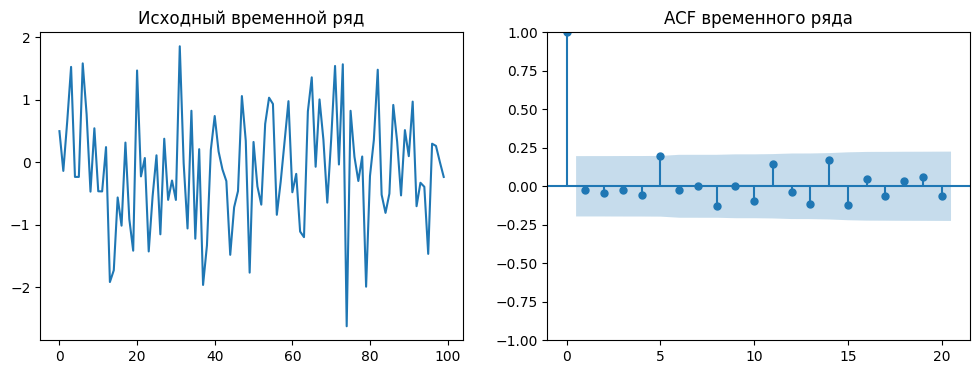

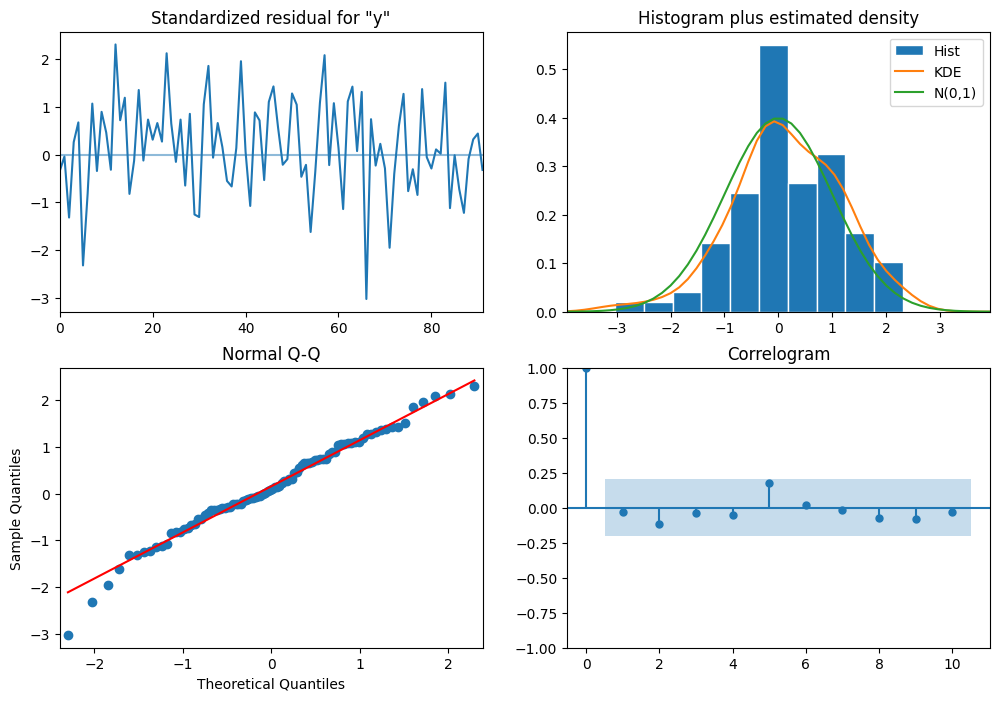

Прогноз следующего значения: -0.29046330399269926
Предсказательный интервал: (-2.1910616973566888, 1.6101350893712905)


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Генерируем искусственные данные
np.random.seed(42)
y = np.random.normal(size=100)  # Временной ряд
seasonal_period = 7  # Период сезонности

# Строим модель SARIMA
sarima_model = sm.tsa.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_period))
sarima_result = sarima_model.fit()

# Визуализация временного ряда и диагностика модели
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(y)
ax1.set_title('Исходный временной ряд')
plot_acf(y, ax=ax2, lags=20, title='ACF временного ряда')
plt.show()

# Диагностика модели SARIMA
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

# Прогноз на одно значение вперед
forecast = sarima_result.get_forecast(steps=1)
forecast_mean = forecast.predicted_mean[0]
forecast_ci = forecast.conf_int(alpha=0.05)

print(f"Прогноз следующего значения: {forecast_mean}")
print(f"Предсказательный интервал: ({forecast_ci[0, 0]}, {forecast_ci[0, 1]})")

**Пример ARIMAX**

Для примера ARIMAX мы используем модель ARIMAX с одним экзогенным регрессором. В качестве экзогенного регрессора возьмем предыдущие значения временного ряда.

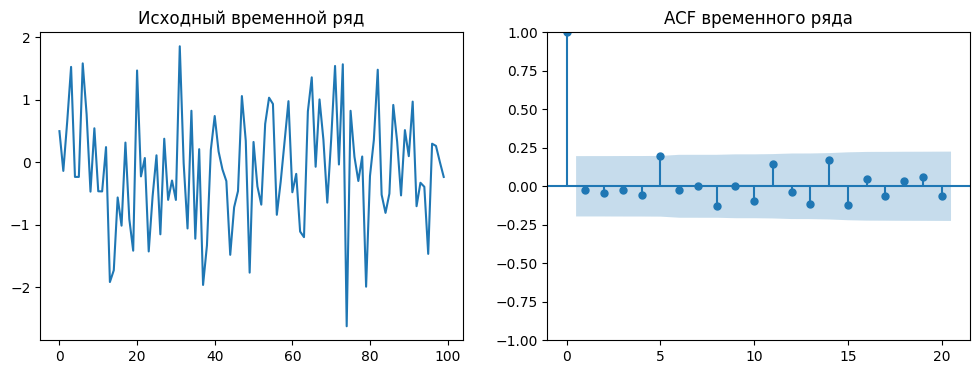

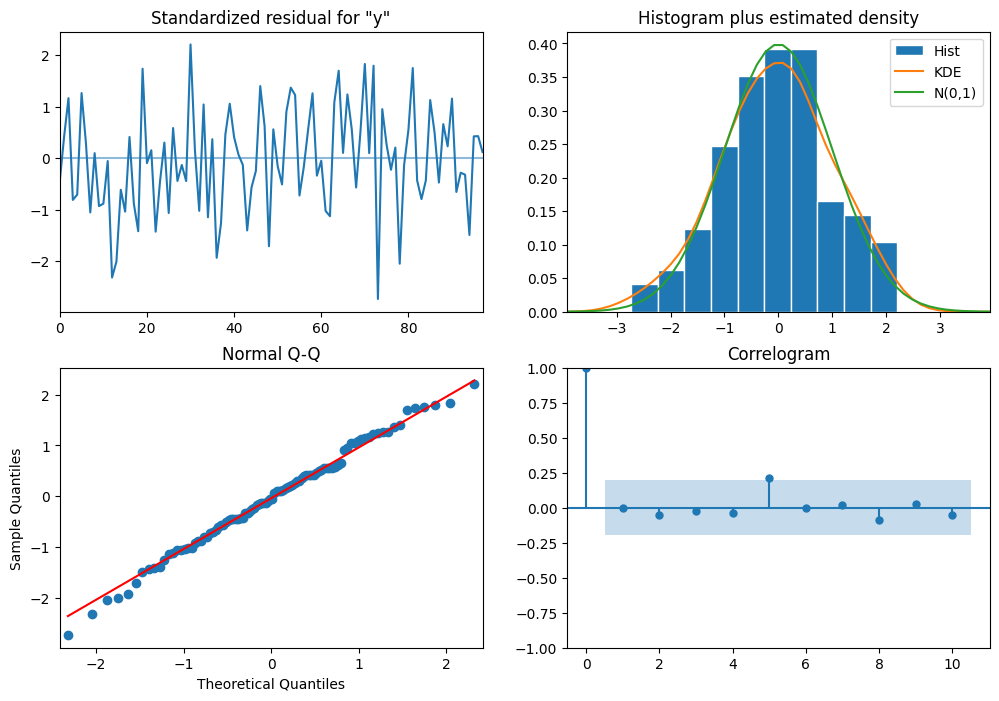

Прогноз следующего значения: -0.09942999692910325
Предсказательный интервал: (-1.8976377851871222, 1.6987777913289157)


In [26]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Генерируем искусственные данные
np.random.seed(42)
y = np.random.normal(size=100)  # Временной ряд
exog = np.roll(y, 1)  # Экзогенный регрессор (предыдущие значения временного ряда)

# Убедимся, что exog имеет ту же длину, что и y
exog = exog[:-1]

# Строим модель ARIMAX
arimax_model = sm.tsa.ARIMA(y[:-1], order=(1, 1, 1), exog=exog)
arimax_result = arimax_model.fit()

# Визуализация временного ряда и диагностика модели
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(y)
ax1.set_title('Исходный временной ряд')
plot_acf(y, ax=ax2, lags=20, title='ACF временного ряда')
plt.show()

# Диагностика модели ARIMAX
arimax_result.plot_diagnostics(figsize=(12, 8))
plt.show()

# Прогноз на одно значение вперед
exog_forecast = np.roll(y, 1)[-1]  # Последнее значение временного ряда в качестве экзогенного регрессора
forecast = arimax_result.get_forecast(steps=1, exog=[exog_forecast])
forecast_mean = forecast.predicted_mean[0]
forecast_ci = forecast.conf_int(alpha=0.05)

print(f"Прогноз следующего значения: {forecast_mean}")
print(f"Предсказательный интервал: ({forecast_ci[0, 0]}, {forecast_ci[0, 1]})")

## Модели VARIMA (Vector Autoregressive Integrated Moving Average)

#### 1. Введение

Модели VARIMA представляют собой расширение моделей ARIMA на случай многомерных временных рядов. Они используются для анализа и прогнозирования временных рядов, где каждая переменная зависит от лагов как её собственных значений, так и значений других переменных.

#### 2. Структура VARIMA модели

Для временного ряда $ Y_t $ с $ k $ переменными и длиной $ T $, VARIMA модель может быть записана следующим образом:

$$ Y_t = \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \ldots + \Phi_p Y_{t-p} + \Theta_1 \epsilon_{t-1} + \Theta_2 \epsilon_{t-2} + \ldots + \Theta_q \epsilon_{t-q} + \epsilon_t $$

где:
- $ Y_t = \begin{pmatrix} Y_{1t} \\ Y_{2t} \\ \vdots \\ Y_{kt} \end{pmatrix} $ - вектор временных рядов размера $ k \times 1 $,
- $ \Phi_i $ - матрицы коэффициентов авторегрессии размера $ k \times k $,
- $ \Theta_i $ - матрицы коэффициентов скользящего среднего размера $ k \times k $,
- $ \epsilon_t $ - вектор многомерного шума с нулевым средним и ковариационной матрицей $ \Sigma $.

#### 3. Оценка параметров VARIMA моделей

Для оценки параметров VARIMA моделей используются следующие шаги:

##### 3.1 Оценка параметров авторегрессии (VAR(p))

Модель VAR(p) описывается уравнением:

$$ Y_t = \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \ldots + \Phi_p Y_{t-p} + \epsilon_t $$

где $ \Phi_i $ - матрицы коэффициентов авторегрессии порядка $ p $.

Оценка параметров $ \Phi_i $ проводится с использованием метода наименьших квадратов (МНК). Для этого необходимо сформировать матрицу лагов $ Y_{t-lag} $ и решить систему уравнений:

$$ Y_t = \Phi Y_{t-lag} + \epsilon_t $$

##### 3.2 Оценка параметров скользящего среднего (VMA(q))

Модель VMA(q) описывается уравнением:

$$ Y_t = \Theta_1 \epsilon_{t-1} + \Theta_2 \epsilon_{t-2} + \ldots + \Theta_q \epsilon_{t-q} + \epsilon_t $$

где $ \Theta_i $ - матрицы коэффициентов скользящего среднего порядка $ q $.

Оценка параметров $ \Theta_i $ также проводится с использованием метода наименьших квадратов, применяя условия ортогональности.

##### 3.3 Оценка ковариационной матрицы $ \Sigma $

Ковариационную матрицу шума $ \Sigma $ можно оценить, используя ковариационную матрицу остатков модели VARIMA.

#### 4. Пример VARIMA модели

Предположим, у нас есть два временных ряда $ Y_{1t} $ и $ Y_{2t} $. Рассмотрим VARIMA(1,1) модель:

$$ \begin{pmatrix} Y_{1t} \\ Y_{2t} \end{pmatrix} = \begin{pmatrix} \Phi_{11} & \Phi_{12} \\ \Phi_{21} & \Phi_{22} \end{pmatrix} \begin{pmatrix} Y_{1,t-1} \\ Y_{2,t-1} \end{pmatrix} + \begin{pmatrix} \Theta_{11} & \Theta_{12} \\ \Theta_{21} & \Theta_{22} \end{pmatrix} \begin{pmatrix} \epsilon_{1,t-1} \\ \epsilon_{2,t-1} \end{pmatrix} + \begin{pmatrix} \epsilon_{1t} \\ \epsilon_{2t} \end{pmatrix} $$

где $ \Phi $ и $ \Theta $ - матрицы коэффициентов авторегрессии и скользящего среднего соответственно.

#### 5. Интерпретация VARIMA моделей

- **Стационарность**: VARIMA модель должна быть стационарной. Это может быть проверено с помощью анализа корней характеристического уравнения.
- **Выбор порядка модели**: Порядок $ p $ и $ q $ модели можно выбрать с использованием информационных критериев (например, AIC, BIC) или с помощью анализа автокорреляций и частичных автокорреляций.


Давайте рассмотрим конкретный числовой пример для VARIMA модели.

### Пример VARIMA модели

Предположим, у нас есть два временных ряда: $ Y_{1t} $ и $ Y_{2t} $. Рассмотрим VARIMA(1,1) модель для этих двух рядов.

#### 1. Загрузка данных

Для примера, давайте создадим два временных ряда $ Y_{1t} $ и $ Y_{2t} $:

$$ Y_{1t} = 0.5 Y_{1,t-1} + 0.2 Y_{2,t-1} + \epsilon_{1t} $$
$$ Y_{2t} = 0.3 Y_{1,t-1} + 0.7 Y_{2,t-1} + \epsilon_{2t} $$

где $ \epsilon_{1t} $ и $ \epsilon_{2t} $ - случайные ошибки с нулевым средним и ковариационной матрицей $ \Sigma $.

#### 2. Формирование VARIMA модели

VARIMA(1,1) модель для двух временных рядов выглядит следующим образом:

$$ \begin{pmatrix} Y_{1t} \\ Y_{2t} \end{pmatrix} = \begin{pmatrix} \Phi_{11} & \Phi_{12} \\ \Phi_{21} & \Phi_{22} \end{pmatrix} \begin{pmatrix} Y_{1,t-1} \\ Y_{2,t-1} \end{pmatrix} + \begin{pmatrix} \Theta_{11} & \Theta_{12} \\ \Theta_{21} & \Theta_{22} \end{pmatrix} \begin{pmatrix} \epsilon_{1,t-1} \\ \epsilon_{2,t-1} \end{pmatrix} + \begin{pmatrix} \epsilon_{1t} \\ \epsilon_{2t} \end{pmatrix} $$

#### 3. Оценка параметров

Для примера, давайте зададим следующие значения для коэффициентов:

$$ \Phi = \begin{pmatrix} 0.5 & 0.2 \\ 0.3 & 0.7 \end{pmatrix}, \quad \Theta = \begin{pmatrix} 0.1 & 0 \\ 0 & 0.1 \end{pmatrix} $$

Это означает, что каждый временной ряд зависит от предыдущих значений как самого себя, так и другого временного ряда, а также от шума.

#### 4. Интерпретация модели

- Коэффициенты $ \Phi $ и $ \Theta $ показывают силу и направление взаимосвязей между рядами и их зависимость от прошлых значений шума.
- Для оценки качества модели можно использовать статистические тесты на остатки, проверку на стационарность и выбор модели с помощью информационных критериев.

#### Заключение

VARIMA модели позволяют моделировать сложные взаимосвязи между временными рядами, что делает их мощным инструментом для анализа и прогнозирования в экономике, финансах, климатологии и других областях, где важно учитывать множественные зависимости.

Реаллизация на Питон

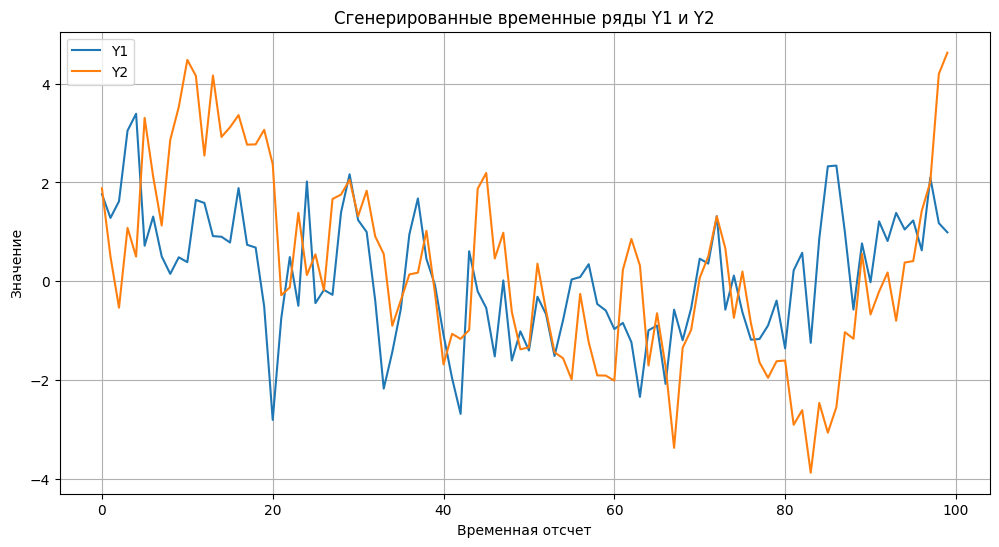

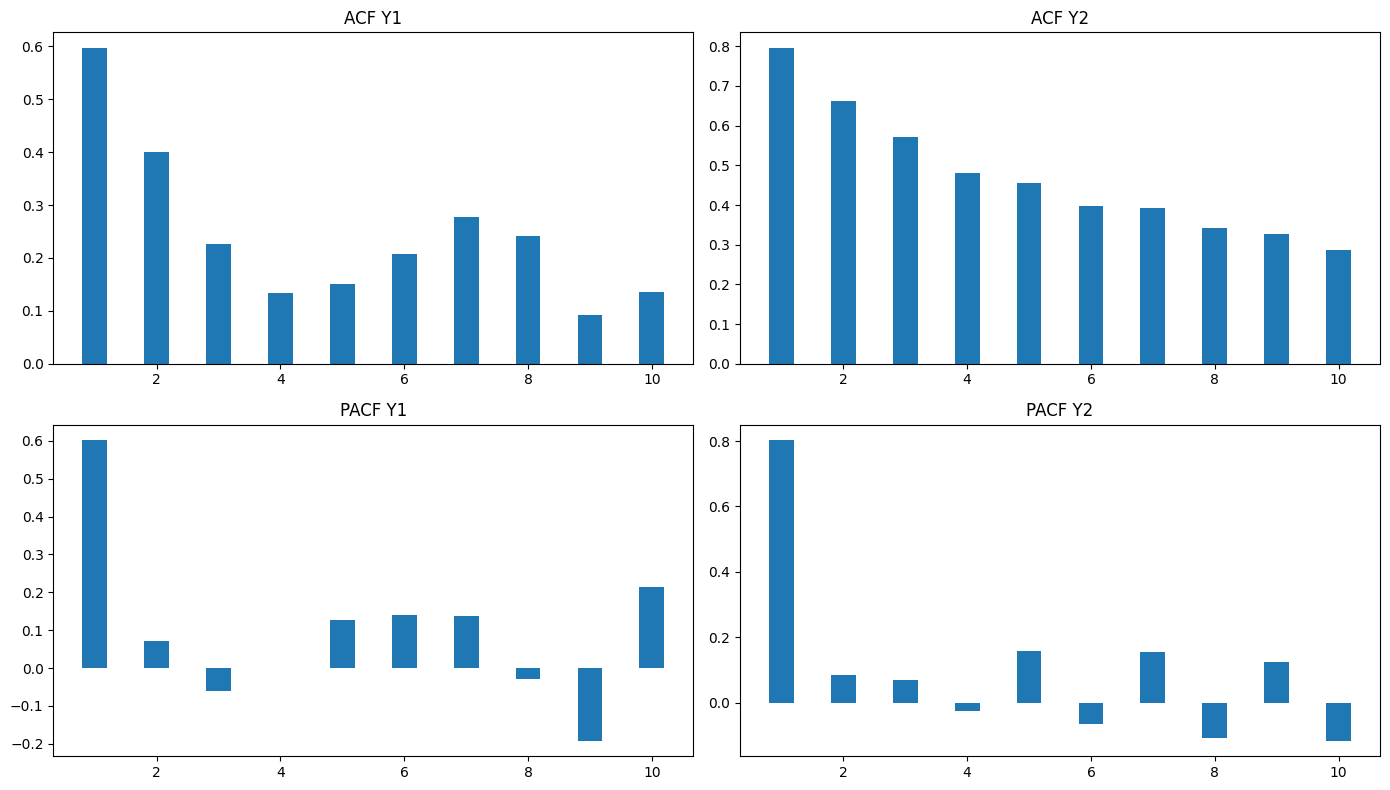

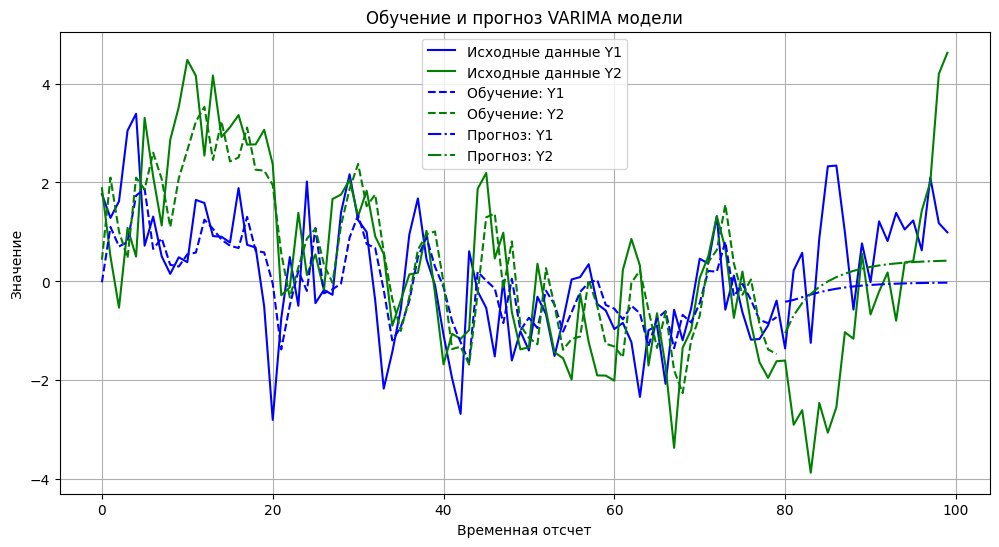

                           Statespace Model Results                           
Dep. Variable:           ['Y1', 'Y2']   No. Observations:                   80
Model:                         VAR(1)   Log Likelihood                -224.187
                          + intercept   AIC                            466.374
Date:                Tue, 09 Jul 2024   BIC                            487.812
Time:                        12:18:39   HQIC                           474.969
Sample:                             0                                         
                                 - 80                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.04   Jarque-Bera (JB):           0.05, 2.99
Prob(Q):                        0.99, 0.85   Prob(JB):                   0.98, 0.22
Heteroskedasticity (H):         0.42, 0.69   Skew:                       0.03, 0.22
Prob(H) (two-sided):            0.03,

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import acf, pacf

# Сгенерируем синтетические данные для VARIMA модели
np.random.seed(0)

# Создадим временной ряд Y1t
n = 100  # длина временного ряда
Y1t = np.zeros(n)
Y1t[0] = np.random.normal(0, 1)  # начальное значение
for t in range(1, n):
    Y1t[t] = 0.5 * Y1t[t-1] + np.random.normal(0, 1)

# Создадим временной ряд Y2t
Y2t = np.zeros(n)
Y2t[0] = np.random.normal(0, 1)  # начальное значение
for t in range(1, n):
    Y2t[t] = 0.3 * Y1t[t-1] + 0.7 * Y2t[t-1] + np.random.normal(0, 1)

# Соединим временные ряды в один DataFrame
data = pd.DataFrame({'Y1': Y1t, 'Y2': Y2t})

# Построим графики временных рядов
plt.figure(figsize=(12, 6))
plt.plot(data['Y1'], label='Y1')
plt.plot(data['Y2'], label='Y2')
plt.title('Сгенерированные временные ряды Y1 и Y2')
plt.xlabel('Временная отсчет')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Построим автокорреляционные функции для определения порядков p и q
lags = 10
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# ACF и PACF для Y1
acf_y1 = acf(data['Y1'], nlags=lags)
pacf_y1 = pacf(data['Y1'], nlags=lags)
axes[0, 0].bar(range(1, lags+1), acf_y1[1:], width=0.4)
axes[0, 0].set_title('ACF Y1')
axes[1, 0].bar(range(1, lags+1), pacf_y1[1:], width=0.4)
axes[1, 0].set_title('PACF Y1')

# ACF и PACF для Y2
acf_y2 = acf(data['Y2'], nlags=lags)
pacf_y2 = pacf(data['Y2'], nlags=lags)
axes[0, 1].bar(range(1, lags+1), acf_y2[1:], width=0.4)
axes[0, 1].set_title('ACF Y2')
axes[1, 1].bar(range(1, lags+1), pacf_y2[1:], width=0.4)
axes[1, 1].set_title('PACF Y2')

plt.tight_layout()
plt.show()

# Определим порядки p и q
p = 1  # порядок авторегрессии
q = 1  # порядок скользящего среднего

# Разделим данные на тренировочную и тестовую выборки
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Обучим VARIMA модель
model = VARMAX(train_data, order=(p, 0, q))
results = model.fit(maxiter=1000, disp=False)

# Прогнозирование на тестовой выборке
forecast = results.forecast(steps=len(test_data))

# Сравним прогноз с фактическими значениями
plt.figure(figsize=(12, 6))
plt.plot(data['Y1'], label='Исходные данные Y1', color='blue')
plt.plot(data['Y2'], label='Исходные данные Y2', color='green')
plt.plot(train_data.index, results.fittedvalues['Y1'], linestyle='--', label='Обучение: Y1', color='blue')
plt.plot(train_data.index, results.fittedvalues['Y2'], linestyle='--', label='Обучение: Y2', color='green')
plt.plot(test_data.index, forecast['Y1'], linestyle='-.', label='Прогноз: Y1', color='blue')
plt.plot(test_data.index, forecast['Y2'], linestyle='-.', label='Прогноз: Y2', color='green')
plt.title('Обучение и прогноз VARIMA модели')
plt.xlabel('Временная отсчет')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Выведем статистику модели
print(results.summary())

## Модели GARCH, VAR и VECM

#### Введение

В этом разделе мы рассмотрим три важных типа моделей, используемых в анализе временных рядов: модели GARCH (Generalized Autoregressive Conditional Heteroskedasticity), VAR (Vector Autoregressive Model) и VECM (Vector Error Correction Model). Каждая из этих моделей имеет свои уникальные свойства и области применения, которые мы подробно обсудим.

### 1. Модель GARCH

Модель GARCH используется для моделирования временных рядов с условной гетероскедастичностью, то есть когда дисперсия ошибки зависит от предыдущих значений ошибок. Это важно в финансовых данных, где волатильность может изменяться со временем.

#### 1.1. Основные понятия

- **ARCH (Autoregressive Conditional Heteroskedasticity)** модель была предложена Робертом Энглом в 1982 году и включает зависимость текущей дисперсии ошибки от прошлых значений квадратов ошибок.
- **GARCH** модель была расширена Боллерслевом в 1986 году и включает также зависимость текущей дисперсии ошибки от прошлых значений самой дисперсии.

#### 1.2. Формулы модели GARCH

Основные уравнения модели GARCH(p, q):

1. **Уравнение условного среднего:**
$$ y_t = \mu + \epsilon_t $$
где $ y_t $ — значение временного ряда в момент времени t, $\mu$ — среднее значение, $\epsilon_t$ — ошибка прогноза.

2. **Уравнение условной дисперсии:**
$$ \epsilon_t = \sigma_t z_t $$
где $\sigma_t^2$ — условная дисперсия в момент времени t, $z_t$ — белый шум с нулевым средним и единичной дисперсией.

3. **Модель условной дисперсии:**
$$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^q \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^p \beta_j \sigma_{t-j}^2 $$
где $\alpha_0 > 0$, $\alpha_i \geq 0$, $\beta_j \geq 0$.

#### 1.3. Пример

Рассмотрим модель GARCH(1,1):

$$ \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2 $$

Параметры модели ($\alpha_0$, $\alpha_1$, $\beta_1$) обычно оцениваются методом максимального правдоподобия.

### 2. Модель VAR

Модель VAR (Vector Autoregressive Model) используется для моделирования нескольких временных рядов, которые могут зависеть друг от друга.

#### 2.1. Основные понятия

- **VAR** модели включают несколько временных рядов и позволяют учитывать взаимные зависимости между ними.
- Применяется в макроэкономике для анализа взаимосвязей между экономическими переменными.

#### 2.2. Формулы модели VAR

Для двух временных рядов $ y_{1,t} $ и $ y_{2,t} $ модель VAR(p) можно записать как:

$$
\begin{cases}
y_{1,t} = c_1 + \phi_{11,1} y_{1,t-1} + \phi_{12,1} y_{2,t-1} + \cdots + \phi_{11,p} y_{1,t-p} + \phi_{12,p} y_{2,t-p} + \epsilon_{1,t} \\
y_{2,t} = c_2 + \phi_{21,1} y_{1,t-1} + \phi_{22,1} y_{2,t-1} + \cdots + \phi_{21,p} y_{1,t-p} + \phi_{22,p} y_{2,t-p} + \epsilon_{2,t}
\end{cases}
$$

где $ \epsilon_{1,t} $ и $ \epsilon_{2,t} $ — ошибки, $ \phi_{ij,k} $ — коэффициенты модели, $ c_1 $ и $ c_2 $ — константы.

#### 2.3. Пример

Рассмотрим модель VAR(1) для двух временных рядов:

$$
\begin{cases}
y_{1,t} = c_1 + \phi_{11} y_{1,t-1} + \phi_{12} y_{2,t-1} + \epsilon_{1,t} \\
y_{2,t} = c_2 + \phi_{21} y_{1,t-1} + \phi_{22} y_{2,t-1} + \epsilon_{2,t}
\end{cases}
$$

Параметры модели оцениваются методом наименьших квадратов.

### 3. Модель VECM

Модель VECM (Vector Error Correction Model) используется для моделирования временных рядов, которые коинтегрированы, то есть имеют долгосрочную равновесную связь.

#### 3.1. Основные понятия

- **Коинтеграция** — это состояние, когда линейная комбинация нестационарных временных рядов оказывается стационарной.
- **VECM** модель используется для учета как долгосрочных, так и краткосрочных связей между временными рядами.

#### 3.2. Формулы модели VECM

Для двух временных рядов $ y_{1,t} $ и $ y_{2,t} $ модель VECM(p) можно записать как:

$$
\Delta y_t = \Pi y_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta y_{t-i} + \epsilon_t
$$

где $ y_t = \begin{pmatrix} y_{1,t} \\ y_{2,t} \end{pmatrix} $, $ \Delta $ — оператор разности, $ \Pi $ и $ \Gamma_i $ — матрицы коэффициентов, $ \epsilon_t $ — вектор ошибок.

Матрица $ \Pi $ содержит информацию о долгосрочных отношениях между временными рядами и может быть разложена как $ \Pi = \alpha \beta' $, где $ \beta $ — матрица коинтеграционных векторов, а $ \alpha $ — матрица коэффициентов корректировки ошибок.

#### 3.3. Пример

Рассмотрим модель VECM(1):

$$
\Delta y_t = \Pi y_{t-1} + \epsilon_t
$$

где $ \Pi = \alpha \beta' $.

Если $ y_t $ — вектор из двух переменных, то:

$$
\Pi = \begin{pmatrix} \alpha_1 \\ \alpha_2 \end{pmatrix} \begin{pmatrix} \beta_1 & \beta_2 \end{pmatrix} = \begin{pmatrix} \alpha_1 \beta_1 & \alpha_1 \beta_2 \\ \alpha_2 \beta_1 & \alpha_2 \beta_2 \end{pmatrix}
$$

Таким образом, уравнение корректировки ошибок может быть записано как:

$$
\Delta y_t = \begin{pmatrix} \alpha_1 \beta_1 & \alpha_1 \beta_2 \\ \alpha_2 \beta_1 & \alpha_2 \beta_2 \end{pmatrix} y_{t-1} + \epsilon_t
$$




Давайте рассмотрим конкретные числовые примеры для каждой из моделей: GARCH, VAR и VECM.

### Пример 1: Модель GARCH

Предположим, что у нас есть временной ряд $ y_t $, который имеет условную гетероскедастичность. Мы хотим построить модель GARCH(1,1).

#### Шаги построения модели GARCH(1,1):

1. **Выбор данных**: Пусть у нас есть следующие значения временного ряда $ y_t $:
   $$ y_t = [3.2, 2.5, 4.1, 3.8, 2.9] $$

2. **Оценка параметров**: Используем метод максимального правдоподобия для оценки параметров модели.

3. **Формулирование модели GARCH(1,1)**:

   - Уравнение для условного среднего:
     $$ y_t = \mu + \epsilon_t $$

   - Уравнение для условной дисперсии:
     $$ \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2 $$

   Здесь $\epsilon_t = \sigma_t z_t$, где $z_t$ — случайная величина из стандартного нормального распределения.

4. **Оценка параметров модели**:

   Допустим, после оценки мы получили следующие значения параметров:
   $$ \alpha_0 = 0.1, \quad \alpha_1 = 0.2, \quad \beta_1 = 0.7 $$

5. **Прогнозирование**: После построения модели можно сделать прогноз значений $ y_t $ и условной дисперсии $ \sigma_t^2 $.

### Пример 2: Модель VAR

Предположим, что у нас есть два временных ряда $ y_{1,t} $ и $ y_{2,t} $, и мы хотим построить модель VAR(1).

#### Шаги построения модели VAR(1):

1. **Выбор данных**: Пусть у нас есть следующие значения временных рядов:
   $$
   y_{1,t} = [1.2, 1.5, 1.7, 2.0, 2.2]
   $$
   $$
   y_{2,t} = [0.8, 0.9, 1.0, 1.2, 1.3]
   $$

2. **Оценка параметров**: Используем метод наименьших квадратов для оценки коэффициентов модели VAR.

3. **Формулирование модели VAR(1)**:

   - Для $ y_{1,t} $:
     $$ y_{1,t} = c_1 + \phi_{11} y_{1,t-1} + \phi_{12} y_{2,t-1} + \epsilon_{1,t} $$

   - Для $ y_{2,t} $:
     $$ y_{2,t} = c_2 + \phi_{21} y_{1,t-1} + \phi_{22} y_{2,t-1} + \epsilon_{2,t} $$

   Здесь $ \epsilon_{1,t} $ и $ \epsilon_{2,t} $ — ошибки модели.

4. **Оценка параметров модели**:

   Допустим, после оценки мы получили следующие значения коэффициентов:
   $$
   \phi_{11} = 0.6, \quad \phi_{12} = -0.3, \quad \phi_{21} = 0.4, \quad \phi_{22} = 0.5
   $$

5. **Прогнозирование**: После построения модели можно сделать прогноз значений $ y_{1,t} $ и $ y_{2,t} $.

### Пример 3: Модель VECM

Предположим, что у нас есть два временных ряда $ y_{1,t} $ и $ y_{2,t} $, которые коинтегрированы, и мы хотим построить модель VECM(1).

#### Шаги построения модели VECM(1):

1. **Выбор данных**: Используем те же данные, что и в примере с VAR.

2. **Оценка коинтеграционных связей**: Предположим, мы проверили коинтеграцию и получили следующий вектор коинтеграции:
   $$ \beta = \begin{pmatrix} 1.0 \\ -1.5 \end{pmatrix} $$

3. **Оценка модели VECM(1)**:

   - Уравнение VECM(1):
     $$ \Delta y_t = \Pi y_{t-1} + \epsilon_t $$
     где $ \Pi = \alpha \beta' $.

   - Для нашего примера:
     $$ \Delta y_t = \begin{pmatrix} \alpha_1 \beta_1 & \alpha_1 \beta_2 \\ \alpha_2 \beta_1 & \alpha_2 \beta_2 \end{pmatrix} y_{t-1} + \epsilon_t $$

     Пусть $ \alpha_1 = 0.5 $ и $ \alpha_2 = -0.8 $.

4. **Прогнозирование**: После оценки модели можно сделать прогнозы для изменений $ y_{1,t} $ и $ y_{2,t} $.

ля реализации моделей GARCH, VAR и VECM на Python нам понадобятся различные библиотеки. В данном примере мы будем использовать библиотеки arch, statsmodels и numpy для оценки и прогнозирования этих моделей.
#### 1. Модель GARCH
Для модели GARCH мы будем использовать библиотеку arch, которая предоставляет удобный интерфейс для оценки GARCH моделей.






In [29]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.6 MB/s eta 0:00:00


Iteration:      1,   Func. Count:      6,   Neg. LLF: 8571473166.555978
Iteration:      2,   Func. Count:     14,   Neg. LLF: 117868.56397289249
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1405.5971720584114
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1417.0490416954644
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1412.4238669917024
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1410.3276416076064
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1411.1034895089213
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1411.9915926501383
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1412.3741562154037
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1412.1352736228596
Iteration:     11,   Func. Count:     72,   Neg. LLF: 4471.452172969959
Iteration:     12,   Func. Count:     82,   Neg. LLF: 456844629.44939095
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1412.5737642345318
Iteration:     14,   Func. Count:     96,   Neg. LLF:

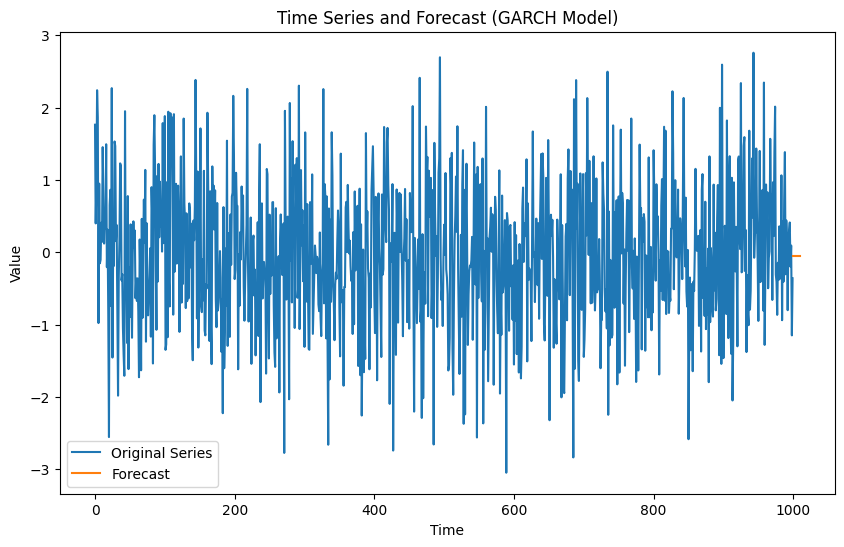

h.01   -0.04807
h.02   -0.04807
h.03   -0.04807
h.04   -0.04807
h.05   -0.04807
h.06   -0.04807
h.07   -0.04807
h.08   -0.04807
h.09   -0.04807
h.10   -0.04807
Name: 999, dtype: float64


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Генерация случайной выборки
np.random.seed(0)
returns = np.random.normal(0, 1, 1000)

# Оценка модели GARCH(1, 1)
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()

# Прогноз на 10 шагов вперёд
forecast_horizon = 10
forecast = model_fit.forecast(horizon=forecast_horizon)

# Визуализация временного ряда и условной волатильности
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(returns, label='Original Series')
ax.plot(np.arange(len(returns), len(returns) + forecast_horizon), forecast.mean.iloc[-1, :], label='Forecast')
ax.set_title('Time Series and Forecast (GARCH Model)')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

# Вывод прогноза
print(forecast.mean.iloc[-1, :])

#### 2. Модель VAR
Для модели VAR мы будем использовать библиотеку statsmodels, которая предоставляет функционал для работы с векторными авторегрессионными моделями.




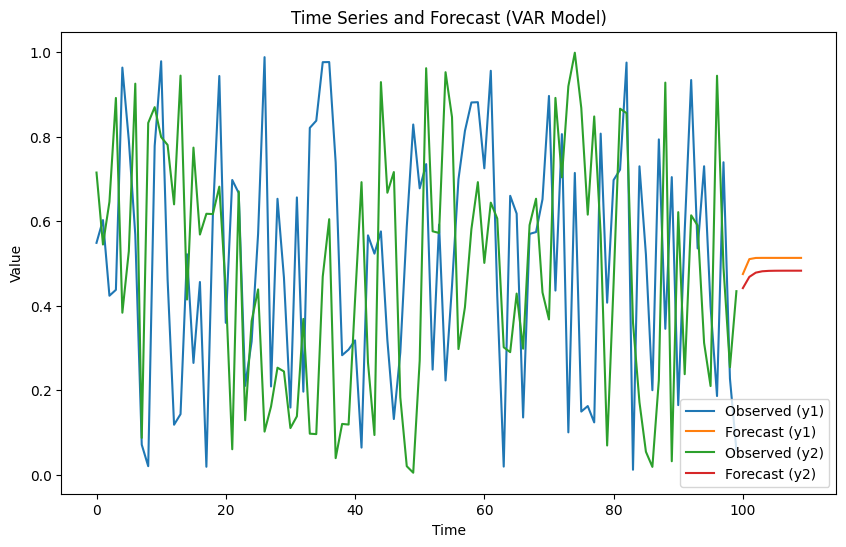

[[0.47495877 0.44170711]
 [0.51031536 0.46823373]
 [0.51308534 0.47831412]
 [0.51323182 0.48152253]
 [0.51321599 0.48250083]
 [0.51320602 0.4827956 ]
 [0.51320257 0.48288411]
 [0.5132015  0.48291066]
 [0.51320118 0.48291863]
 [0.51320108 0.48292102]]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Генерация случайной выборки
np.random.seed(0)
nobs = 100
y = np.random.random((nobs, 2))

# Построение модели VAR(1)
model = sm.tsa.VAR(y)
results = model.fit(maxlags=1)

# Прогноз на 10 шагов вперёд
forecast_horizon = 10
forecast = results.forecast(y[-1:], steps=forecast_horizon)

# Визуализация временного ряда и прогноза
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(nobs), y[:, 0], label='Observed (y1)')
ax.plot(np.arange(nobs, nobs + forecast_horizon), forecast[:, 0], label='Forecast (y1)')
ax.plot(np.arange(nobs), y[:, 1], label='Observed (y2)')
ax.plot(np.arange(nobs, nobs + forecast_horizon), forecast[:, 1], label='Forecast (y2)')
ax.set_title('Time Series and Forecast (VAR Model)')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

# Вывод прогноза
print(forecast)

#### 3. Модель VECM
Для модели VECM (Vector Error Correction Model) также используем библиотеку statsmodels, которая поддерживает оценку коинтеграционных моделей.


Det. terms outside the coint. relation & lagged endog. parameters for equation y1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.0272      0.101     -0.269      0.788      -0.225       0.171
L1.y2         -0.1450      0.100     -1.447      0.148      -0.341       0.051
Det. terms outside the coint. relation & lagged endog. parameters for equation y2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.0227      0.103     -0.220      0.826      -0.225       0.179
L1.y2         -0.0706      0.102     -0.690      0.490      -0.271       0.130
                 Loading coefficients (alpha) for equation y1                 
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

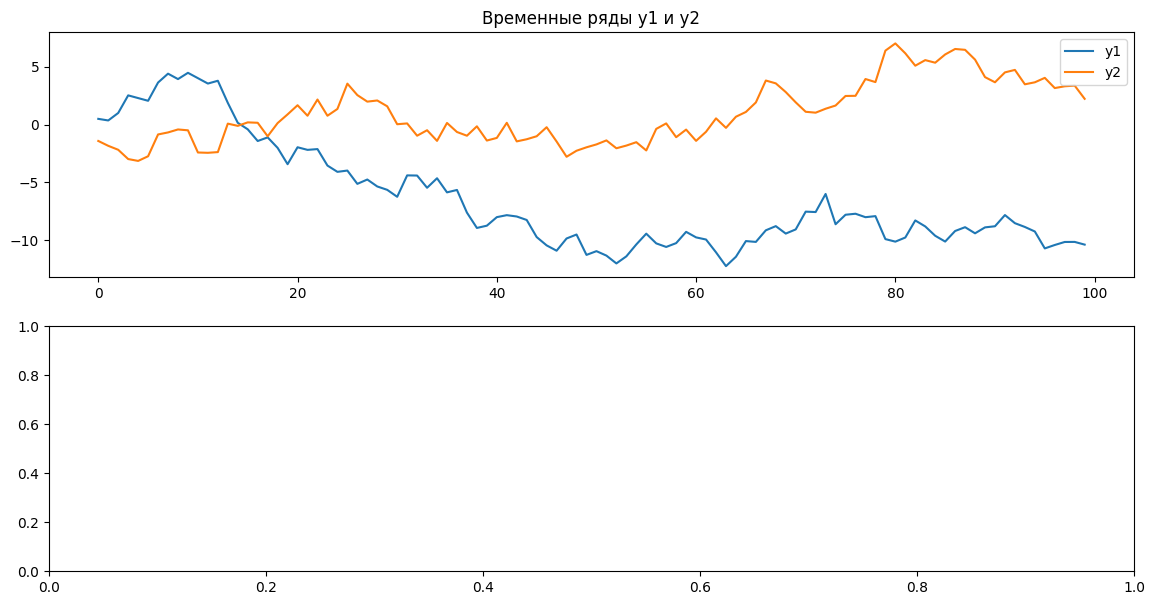

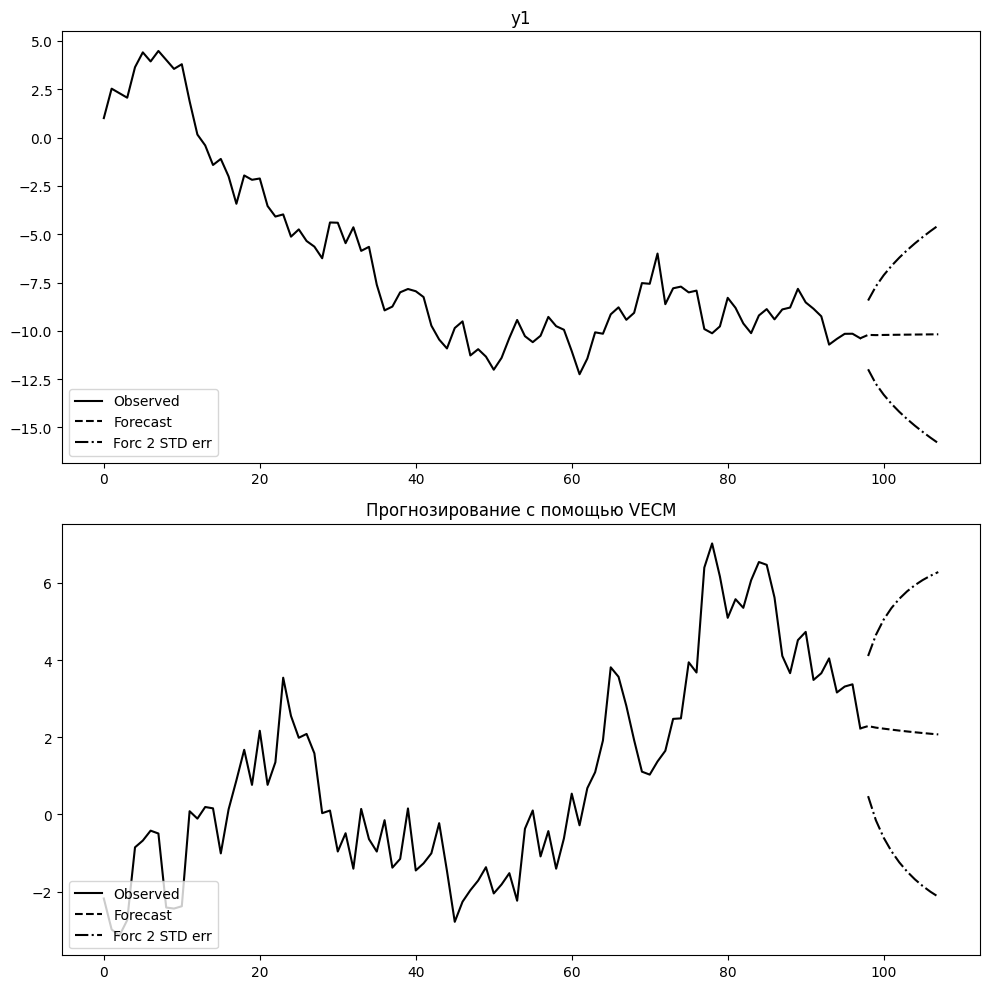

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Зададим случайные данные для временных рядов
np.random.seed(42)

# Генерируем два временных ряда
n_obs = 100
y1 = np.random.randn(n_obs).cumsum()
y2 = np.random.randn(n_obs).cumsum()

# Создаем матрицу данных Y для модели VECM
Y = np.array([y1, y2]).T

# Определим модель VECM
model = sm.tsa.VECM(Y, k_ar_diff=1)

# Оценим параметры модели
results = model.fit()

# Выведем результаты оценки
print(results.summary())

# Визуализация временных рядов
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y1, label='y1')
plt.plot(y2, label='y2')
plt.title('Временные ряды y1 и y2')
plt.legend()

# Графики оценок
plt.subplot(2, 1, 2)
results.plot_forecast(10)  # Прогноз на 10 периодов
plt.title('Прогнозирование с помощью VECM')

plt.tight_layout()
plt.show()

## Вопросы для закрепления темы
1. Что такое временной ряд и какие типы временных рядов существуют?
2. Какие характеристики временного ряда важны для его анализа?
3. В чем состоит концепция стационарности временного ряда?
4. Какие методы можно использовать для проверки стационарности временного ряда?
5. Что такое модель ARIMA и какие компоненты входят в эту модель?
6. Каково применение модели ARIMA для прогнозирования временных рядов?
7. Какие особенности имеет модель SARIMA по сравнению с обычной ARIMA?
8. Что такое структура модели SARIMA и как выбираются ее параметры?
9. Какие методы можно использовать для определения оптимальных параметров модели ARIMA/SARIMA?
10. Что такое частичная автокорреляционная функция (PACF) и как она используется для определения порядка модели ARIMA?
11. Какие шаги следует выполнить для подготовки данных перед построением модели ARIMA?
12. Какие виды трендов могут присутствовать во временном ряде и как они влияют на модель ARIMA?
13. В чем заключается методика дифференцирования временного ряда и зачем она нужна?
14. Как происходит оценка параметров модели ARIMA и какие методы используются для этой цели?
15. Что такое модель экспоненциального сглаживания (Exponential Smoothing) и как она сравнивается с моделями ARIMA?
16. Какие преимущества и недостатки у моделей ARIMA по сравнению с моделями на основе машинного обучения?
17. Какие предварительные анализы следует выполнить перед построением модели ARIMA?
18. Какие методы можно использовать для оценки качества прогнозирования моделей временных рядов?
19. Какие факторы могут повлиять на стационарность временного ряда и как их можно учитывать при моделировании?
20. Как модели временных рядов могут быть адаптированы для работы с сезонными колебаниями?
21. Что такое модель ARIMAX и в чем ее отличие от модели ARIMA?
22. Какие техники можно использовать для учета выбросов (аномалий) в данных при прогнозировании с помощью моделей временных рядов?
23. Какие методы используются для прогнозирования многомерных временных рядов с использованием моделей VARIMA?
24. Как можно расширить модель ARIMA для учета нелинейных зависимостей в данных?
25. Какие методы можно использовать для идентификации и устранения мультиколлинеарности в моделях временных рядов?
26. В чем состоит методика кросс-валидации при выборе параметров модели ARIMA?
27. Какие инструменты и библиотеки можно использовать для построения и анализа моделей временных рядов на Python?
28. Какие принципы и методы стоит использовать для прогнозирования длинных временных рядов с использованием моделей ARIMA?
29. Как модель ARIMA может быть применена для анализа и прогнозирования финансовых временных рядов?




## Задачи для самостоятельной работы

1. Исследование и построение модели скользящего среднего MA(2) для заданного временного ряда.
2. Оценка параметров модели AR(1) с использованием метода максимального правдоподобия.
3. Применение модели ARIMA(1, 1, 1) к нестационарному временному ряду.
4. Построение прогноза с использованием модели ARIMA(2, 0, 1).
5. Анализ частичной автокорреляционной функции для определения порядка модели AR.
6. Оценка коэффициентов модели ARMA(2, 1) с использованием метода наименьших квадратов.
7. Сравнение моделей ARIMA(1, 0, 0) и ARIMA(0, 1, 1) для одного и того же временного ряда.
8. Исследование модели SARIMA(1, 1, 1)(1, 0, 1)_12 для временного ряда с сезонной компонентой.
9. Применение модели ARIMAX для учета внешних регрессоров в прогнозировании.
10. Анализ ряда на наличие сезонности и определение периода сезонной составляющей.
11. Построение автокорреляционной функции и частичной автокорреляционной функции для временного ряда.
12. Разработка процедуры стабилизации дисперсии временного ряда перед применением модели ARIMA.
13. Поиск оптимальных значений параметров p, d, q для модели ARIMA с использованием информационных критериев.
14. Построение прогноза с помощью модели ARIMA на несколько шагов вперед.
15. Сравнение точности прогнозов моделей ARIMA и экспоненциального сглаживания на одном и том же временном ряду.
16. Исследование эффекта выбросов на оценки и прогнозы модели ARIMA.
17. Анализ автокорреляций остатков модели ARIMA для проверки их случайности и отсутствия структурных зависимостей.
18. Исследование модели ARIMA(0, 1, 1) для моделирования случайного блуждания.
19. Построение предсказательных интервалов для прогнозов модели ARIMA с использованием метода бутстреп.
20. Разработка модели SARIMAX с включением внешнего регрессора (экзогенной переменной) в качестве предиктора.

21. Построение модели ARIMA(2, 1, 0) для временного ряда с трендом.
22. Сравнение моделей SARIMA(1, 1, 1)(0, 1, 1)_12 и SARIMA(1, 1, 1)(1, 0, 0)_12 для сезонного временного ряда.
23. Исследование стационарности и необходимость дифференцирования для временного ряда перед применением модели ARIMA.
24. Анализ остатков модели ARIMA для проверки их нормальности и гомоскедастичности.
25. Построение модели ARIMA(0, 1, 2) для временного ряда с циклическим трендом.
26. Применение модели ARIMA к нескольким временным рядам одновременно и сравнение результатов прогнозирования.
27. Разработка скрипта на Python для автоматизации поиска оптимальных параметров модели ARIMA с использованием кросс-валидации.
28. Исследование зависимости точности прогнозов модели ARIMA от длины исходного временного ряда.
29. Построение модели SARIMA для прогнозирования сезонного временного ряда с учетом длинного цикла.
30. Анализ влияния аномалий (выбросов) на прогнозы модели ARIMA и разработка метода их обнаружения и коррекции.


## Литература

1) https://education.yandex.ru/handbook/ml/article/modeli-vida-arima